# Table of Contents
 <p><div class="lev1"><a href="#Our-plan"><span class="toc-item-num">1&nbsp;&nbsp;</span>Our plan</a></div><div class="lev1"><a href="#Assessing-the-relationship-between-each-variable-and-the-target"><span class="toc-item-num">2&nbsp;&nbsp;</span>Assessing the relationship between each variable and the target</a></div><div class="lev2"><a href="#Bivariate-plotting"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bivariate plotting</a></div><div class="lev1"><a href="#Target:-GDP-per-capita"><span class="toc-item-num">3&nbsp;&nbsp;</span>Target: GDP per capita</a></div><div class="lev2"><a href="#Joint-plot"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Joint plot</a></div><div class="lev2"><a href="#Hexbin"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Hexbin</a></div><div class="lev2"><a href="#Correlation"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Correlation</a></div><div class="lev1"><a href="#Target:-GDP-per-capita,-binned"><span class="toc-item-num">4&nbsp;&nbsp;</span>Target: GDP per capita, binned</a></div><div class="lev2"><a href="#Dealing-with-lots-of-variables"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dealing with lots of variables</a></div><div class="lev3"><a href="#Ranking-by-f-value"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Ranking by f-value</a></div><div class="lev2"><a href="#To-do:-Gather-observations,-new-hypotheses-and-questions"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><strong>To do</strong>: Gather observations, new hypotheses and questions</a></div><div class="lev1"><a href="#Choose-another-&quot;target-variable&quot;-for-analyzing"><span class="toc-item-num">5&nbsp;&nbsp;</span>Choose another "target variable" for analyzing</a></div>

In [1]:
# must go first 
%matplotlib inline 
%config InlineBackend.figure_format='retina'

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium

# system packages 
import os, sys
import warnings
warnings.filterwarnings('ignore')

# basic wrangling 
import numpy as np
import pandas as pd

# eda tools 
import pivottablejs
import missingno as msno
import pandas_profiling

# interactive 
import ipywidgets as widgets

# more technical eda
import sklearn
import scipy

In [2]:
from aqua_helper import *

In [3]:
mpl_update = {'font.size':16,
              'xtick.labelsize':14,
              'ytick.labelsize':14,
              'figure.figsize':[12.0,8.0],
              'axes.color_cycle':['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', '#D34100', '#FF9700','#091D32'], 
              'axes.labelsize':16,
              'axes.labelcolor':'#677385',
              'axes.titlesize':20,
              'lines.color':'#0055A7',
              'lines.linewidth':3,
              'text.color':'#677385'}
mpl.rcParams.update(mpl_update)

# Our plan

<img src="figures/branches.jpg" alt="Crisp-DM" width="390" align="right">
Exploratory data analysis consists of the following major tasks, which we present linearly here because each task doesn't make much sense to do without the ones prior to it. However, in reality, you are going to constantly jump around from step to step.  You may want to do all the steps for a subset of the variables first. Or often, an observation will bring up a question you want to investigate and you'll branch off and explore to answer that question before returning down the main path of exhaustive EDA.

1. Form hypotheses/develop investigation themes to explore 
3. Wrangle data 
3. Assess quality of data 
4. Profile data 
5. Explore each individual variable in the dataset 
6. **Assess the relationship between each variable and the target** 
7. Assess interactions between variables 
8. Explore data across many dimensions 

Throughout the entire analysis you want to:
* Capture a list of hypotheses and questions that come up for further exploration.
* Record things to watch out for/ be aware of in future analyses. 
* Show intermediate results to colleagues to get a fresh perspective, feedback, domain knowledge. Don't do EDA in a bubble! Get feedback throughout especially from people removed from the problem and/or with relevant domain knowledge. 
* Position visuals and results together. EDA relies on your natural pattern recognition abilities so maximize what you'll find by putting visualizations and results in close proximity. 


# Assessing the relationship between each variable and the target

Assess each relationship’s:
* Linearity 
* Direction 
* Rough size 
* Strength

## Bivariate plotting 

CATEGORICAL X CATEGORICAL
* [Heat map of contingency table](http://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) 
* [Multiple bar plots](http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot#bar-plots) 

CATEGORICAL X CONTINUOUS 
* [Box plots](http://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) of continuous for each category
* [Violin plots](http://seaborn.pydata.org/examples/simple_violinplots.html) of continuous distribution for each category
* Overlaid [histograms](http://seaborn.pydata.org/tutorial/distributions.html#histograms) (if 3 or less categories)

CONTINUOUS X CONTINOUS 
* [Scatter plots](http://seaborn.pydata.org/examples/marginal_ticks.html?highlight=scatter) 
* [Hexibin plots](http://seaborn.pydata.org/tutorial/distributions.html#hexbin-plots)
* [Joint kernel density estimation plots](http://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation)
* [Correlation matrix heatmap](http://seaborn.pydata.org/examples/network_correlations.html?highlight=correlation)

In [5]:
data = pd.read_csv('../data/aquastat/aquastat.csv.gzip', compression='gzip')

# simplify regions
data.region = data.region.apply(lambda x: simple_regions[x])

# remove exploitable fields and national rainfall index
data = data.loc[~data.variable.str.contains('exploitable'),:]
data = data.loc[~(data.variable=='national_rainfall_index')]

# Uncomment to print out variable names and explanations
# data[['variable','variable_full']].drop_duplicates()

# Subset for cross-sectional analysis
recent = time_slice(data, '2013-2017')

# Target: GDP per capita

All of our variables are continuous so this will be a CONTINUOUS X CONTINUOUS analysis. 

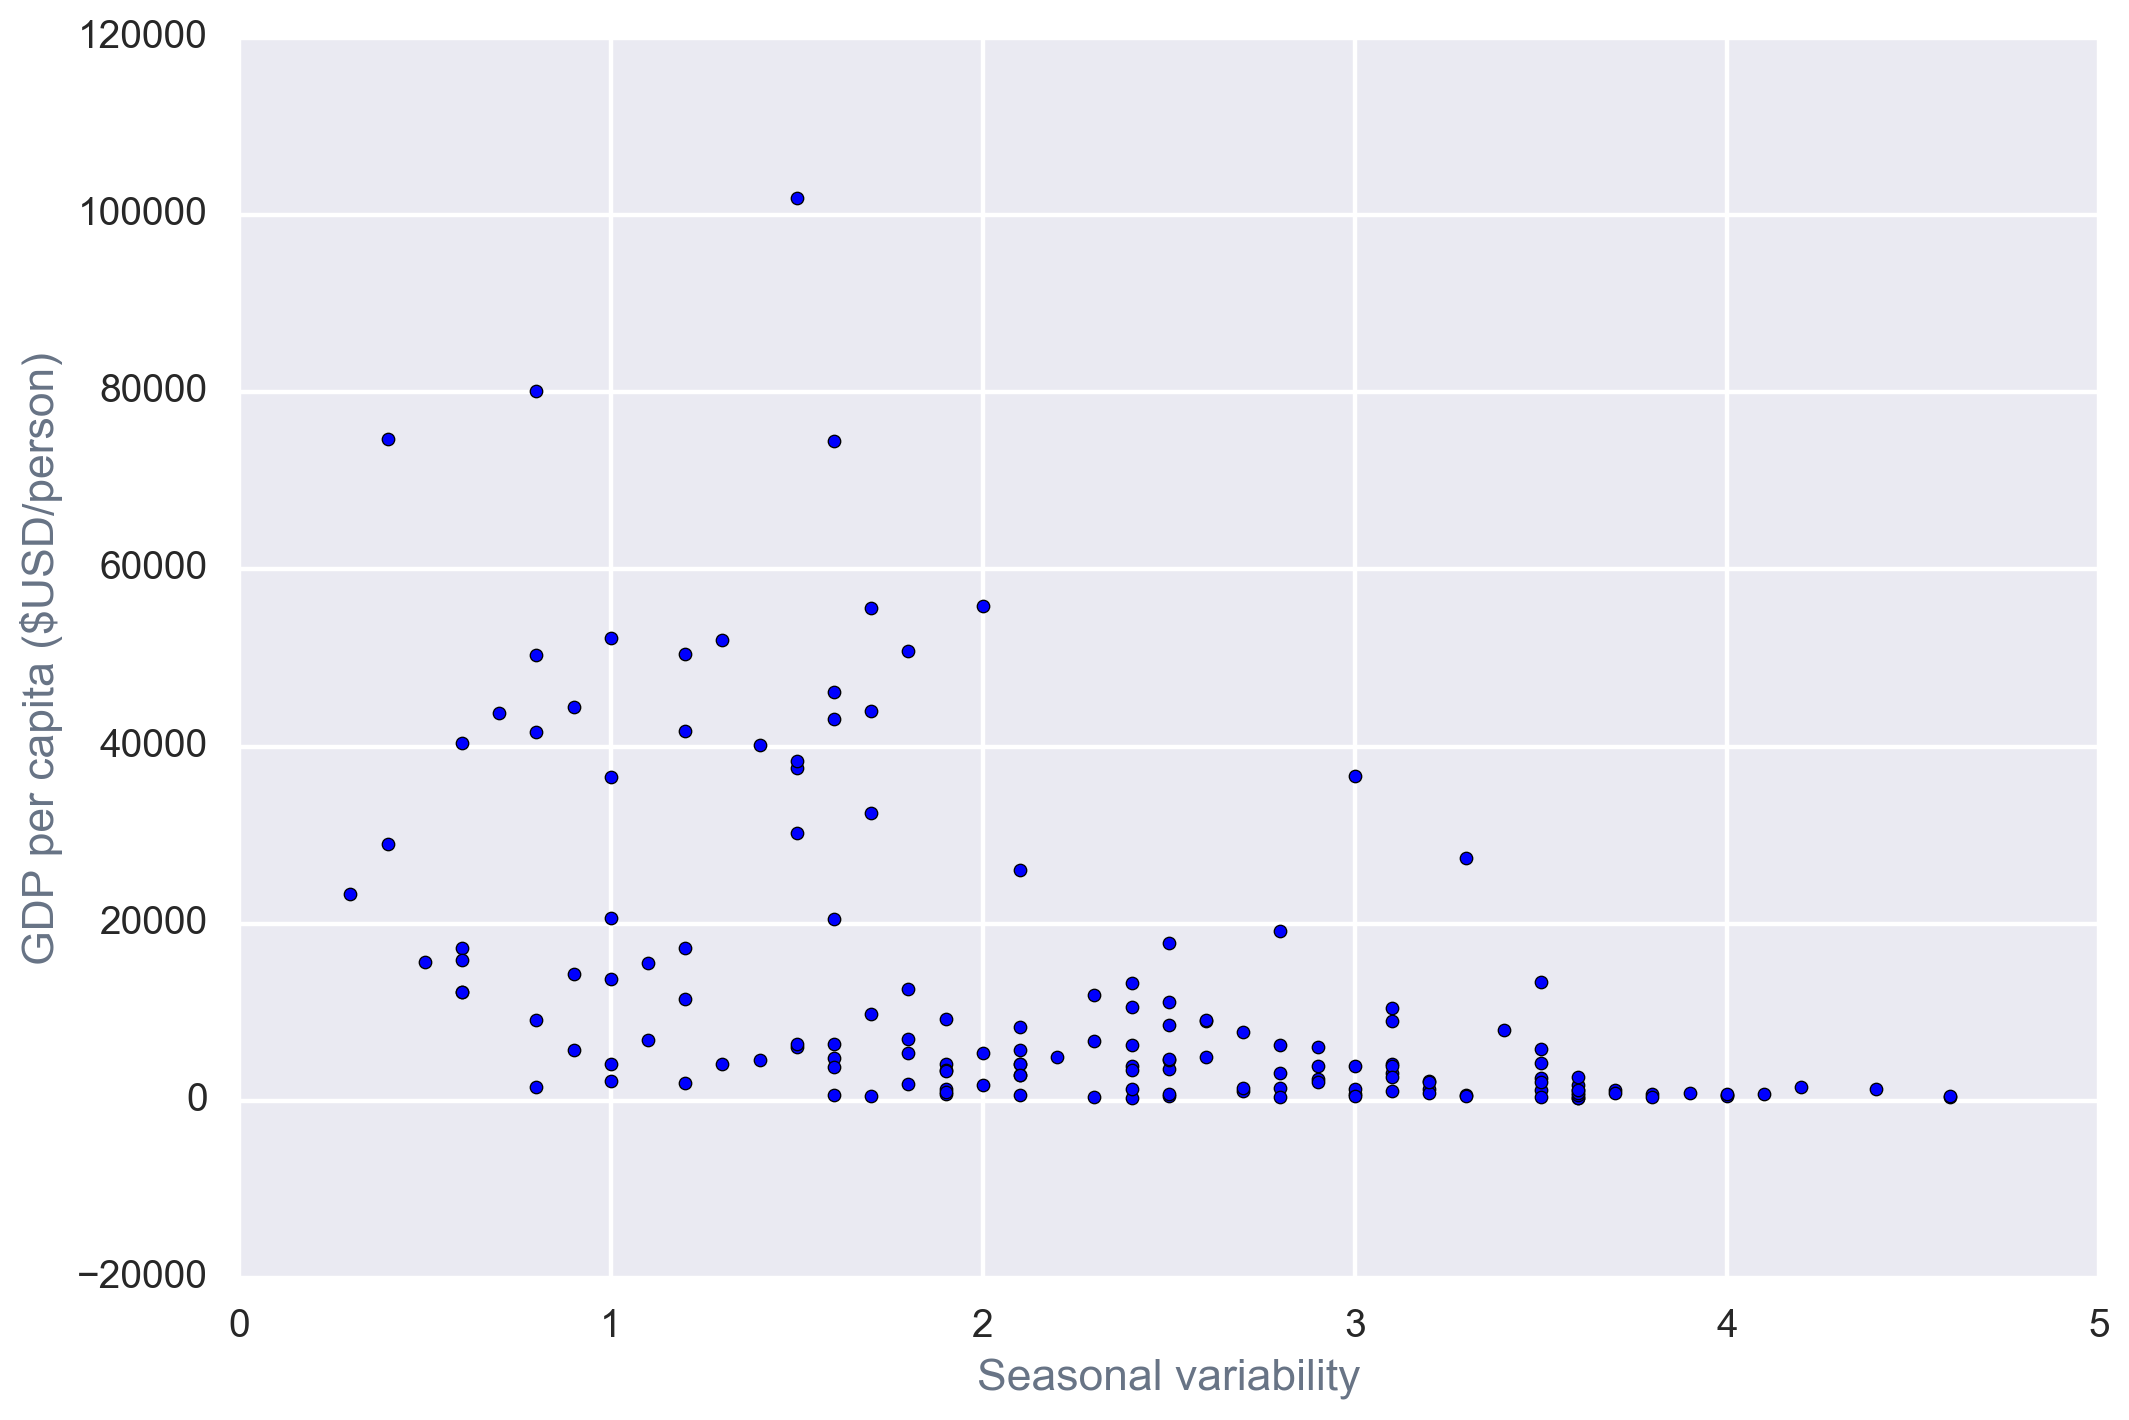

In [6]:
# recent.drop('gdp_bin', axis=1).astype(float).plot(x='seasonal_variability',y='gdp_per_capita', kind='scatter');
plt.scatter(recent.seasonal_variability, recent.gdp_per_capita)
plt.xlabel('Seasonal variability');
plt.ylabel('GDP per capita ($USD/person)');

Here we functionalize the plot above and add the ability to color each marker (for later). 

In [7]:
def plot_scatter(df, x, y, xlabel=None, ylabel=None, title=None,
                 logx=False, logy=False, by=None, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(12, 10))

    colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
    if by:
        groups = df.groupby(by)
        for j, (name, group) in enumerate(groups):
            ax.scatter(group[x], group[y], color=colors[j], label=name)
        ax.legend()
    else:
        ax.scatter(df[x], df[y], color=colors[0])
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')

    ax.set_xlabel(xlabel if xlabel else x);
    ax.set_ylabel(ylabel if ylabel else y);
    if title:
        ax.set_title(title);
    return ax

## Joint plot

Now we might also want to understand the relationship between the two variables *and* the distribution of each individually. For this we can use the joint plot from seaborn. 

In [8]:
svr = [recent.seasonal_variability.min(), recent.seasonal_variability.max()]
gdpr = [(recent.gdp_per_capita.min()), recent.gdp_per_capita.max()] 
gdpbins = np.logspace(*np.log10(gdpr), 25)

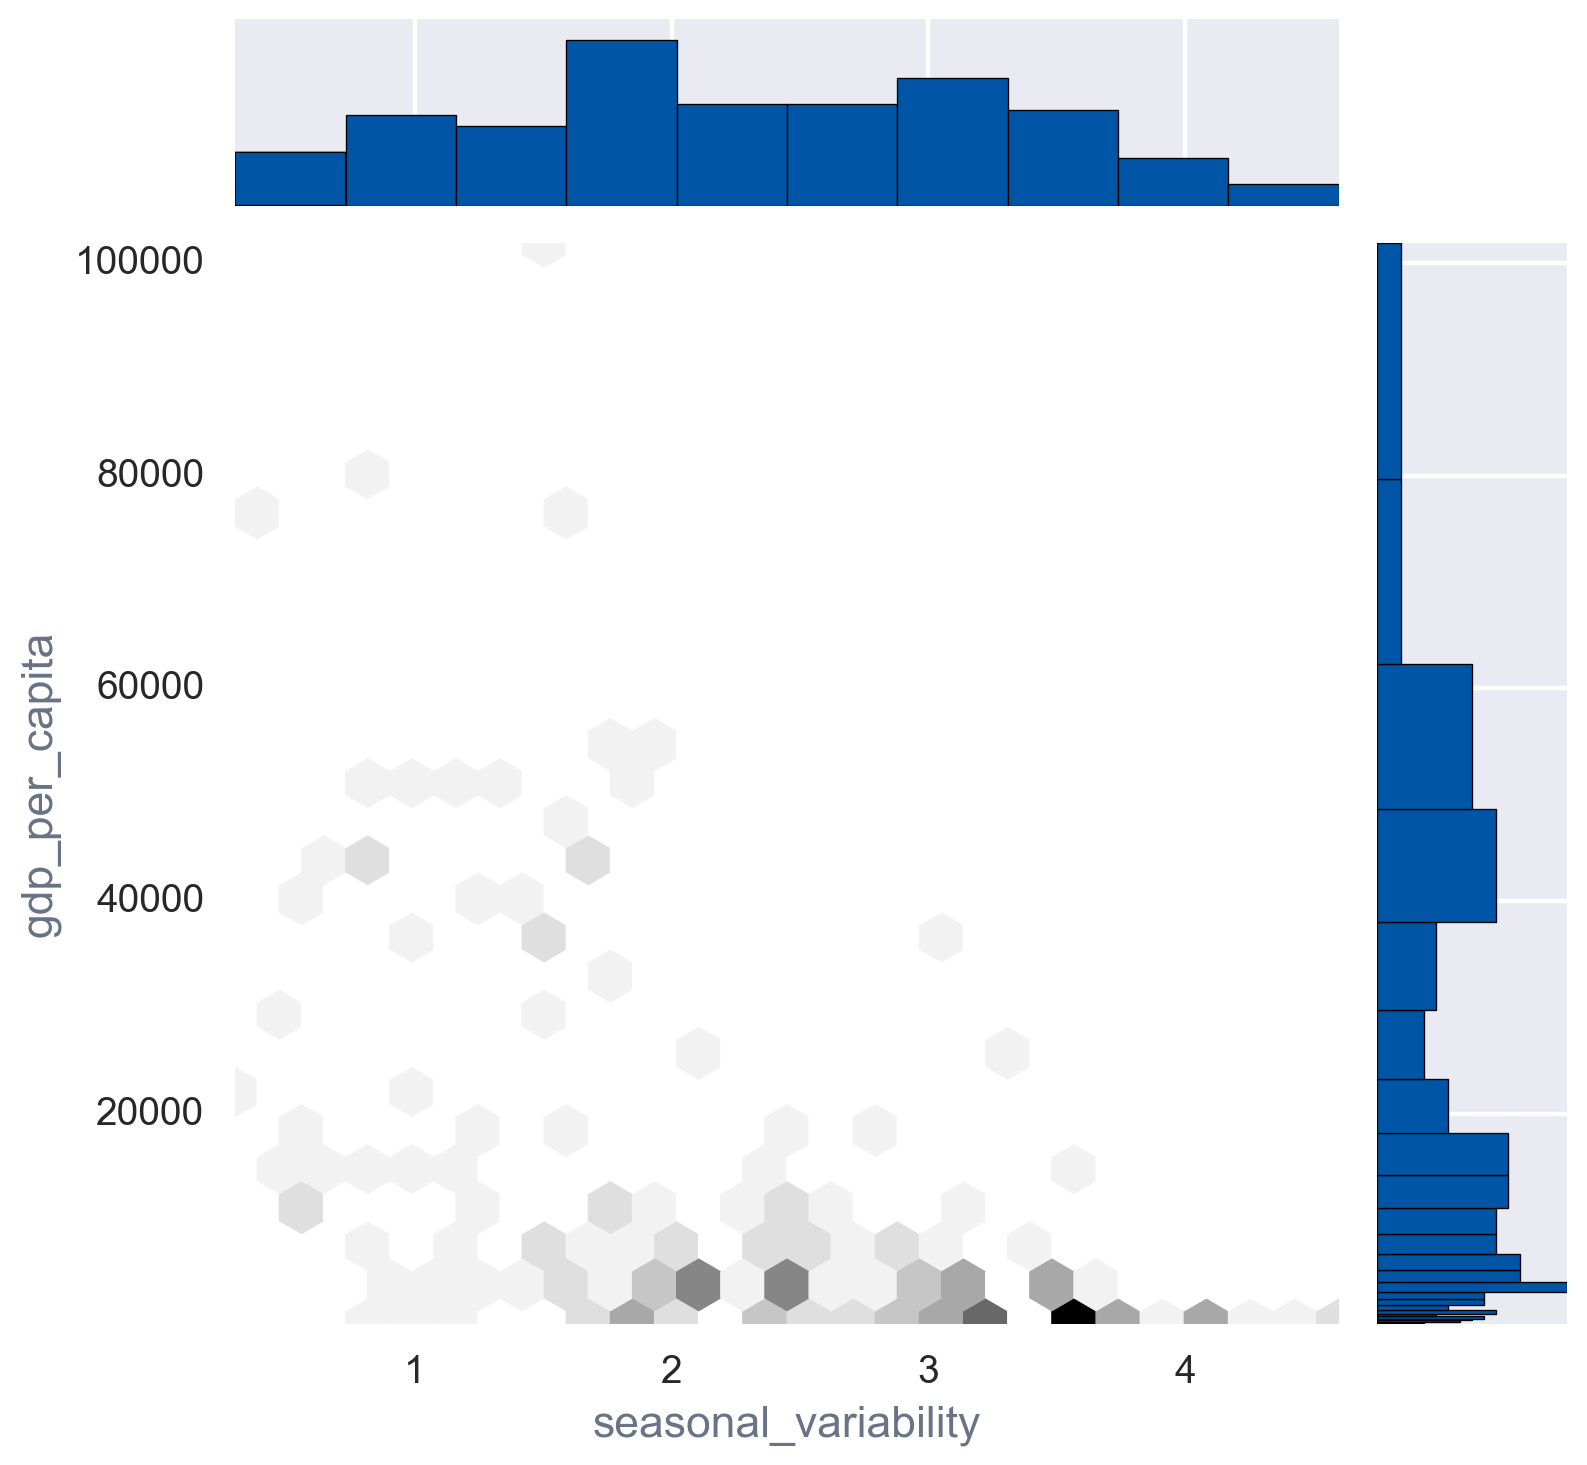

In [9]:
g =sns.JointGrid(x="seasonal_variability", y="gdp_per_capita", data=recent, ylim=gdpr)
g.ax_marg_x.hist(recent.seasonal_variability, range=svr)
g.ax_marg_y.hist(recent.gdp_per_capita, range=gdpr, bins=gdpbins, orientation="horizontal")
g.plot_joint(plt.hexbin, gridsize=25)
ax = g.ax_joint
# ax.set_yscale('log')
g.fig.set_figheight(8)
g.fig.set_figwidth(9)

## Hexbin

Now what if we had lots of datapoints and couldn't differentiate each scatter point in the figure above? We might care more about where points are concentrated in the bivariate space, much like a histogram but for two variables. For this, we can use a hexbin plot, used below instead of the scatter plot in the joint grid. 

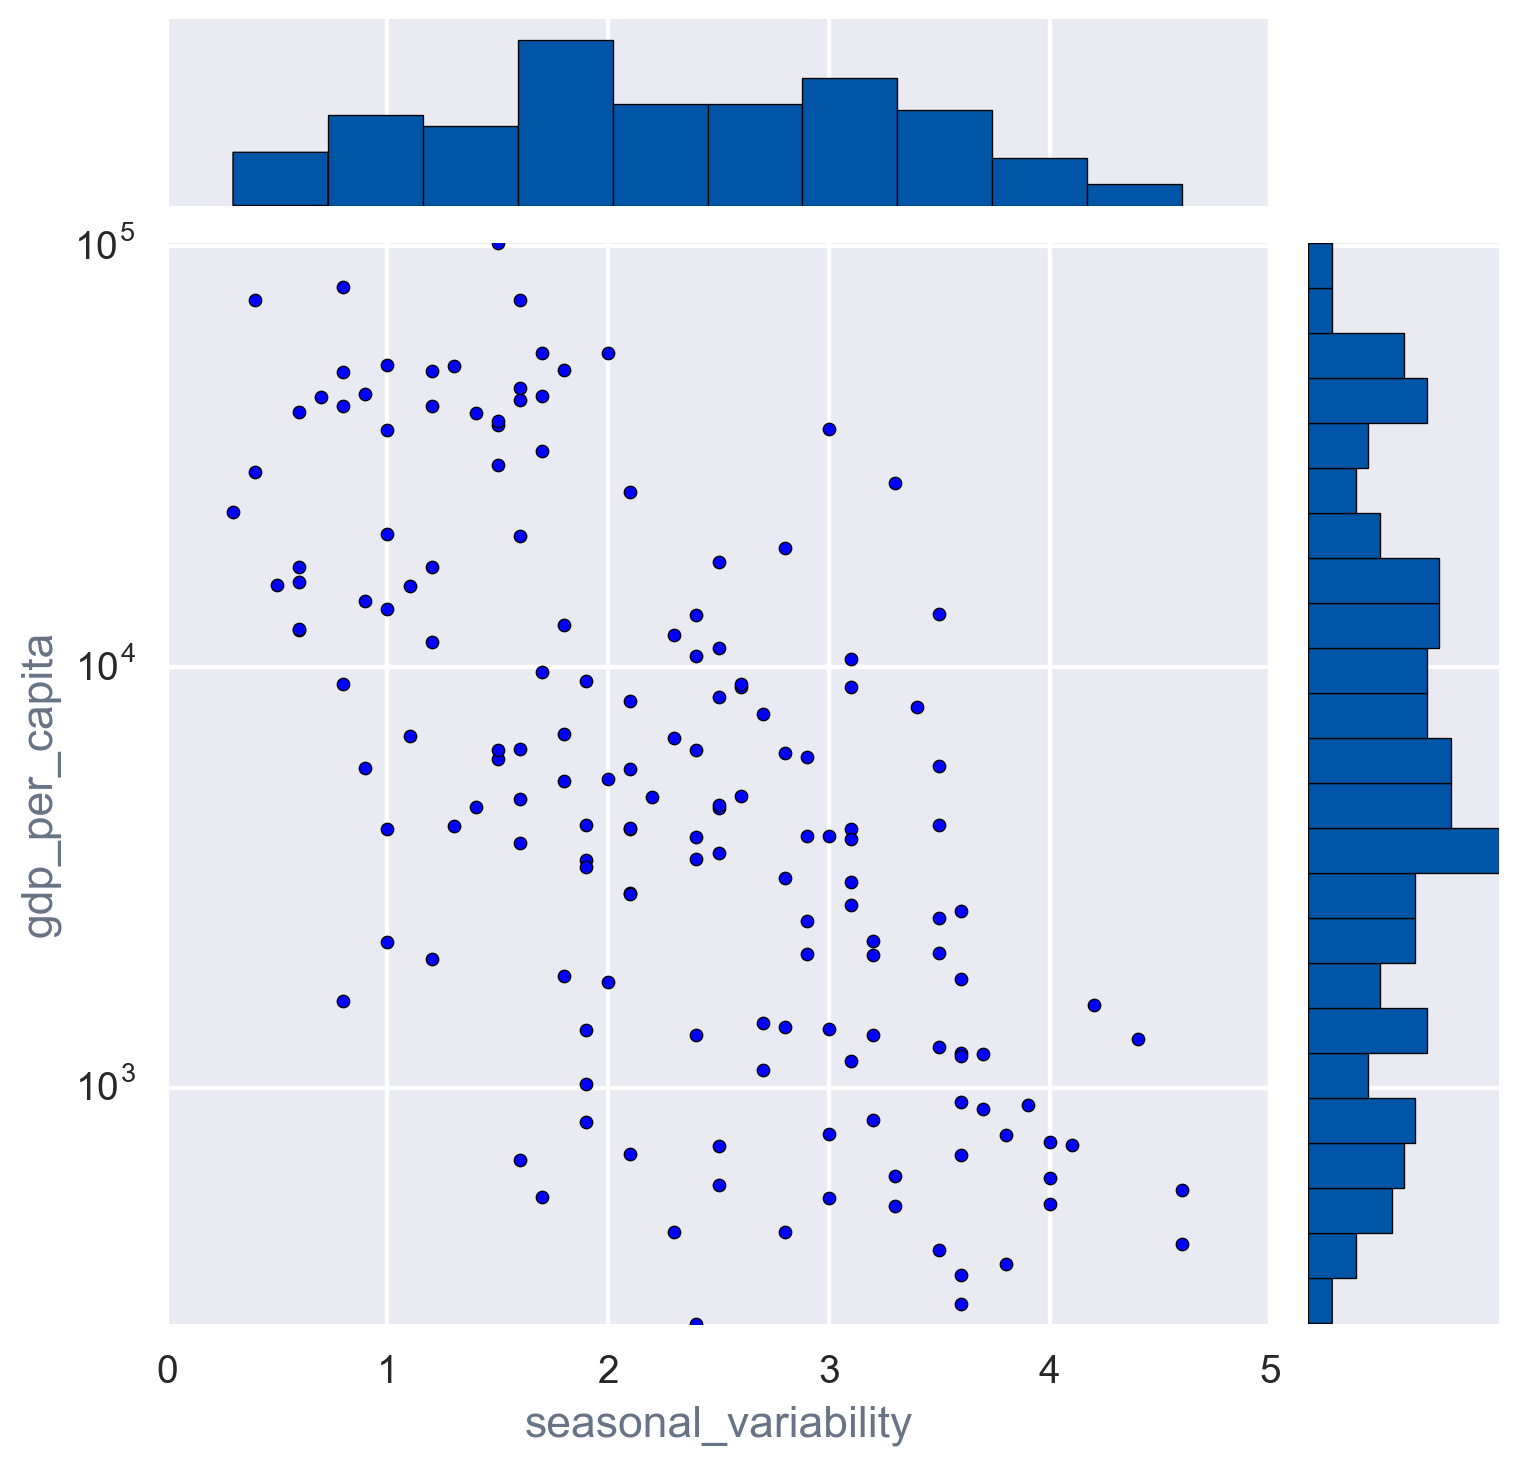

In [10]:
g =sns.JointGrid(x="seasonal_variability", y="gdp_per_capita", data=recent, ylim=gdpr)
g.ax_marg_x.hist(recent.seasonal_variability, range=svr)
g.ax_marg_y.hist(recent.gdp_per_capita, range=gdpr, bins=gdpbins, orientation="horizontal")
g.plot_joint(plt.scatter)
ax = g.ax_joint
ax.set_yscale('log')
g.fig.set_figheight(8)
g.fig.set_figwidth(9)

## Correlation

Correlation measures the strength of a *linear relationship* between two variables. We could use correlation to identify the variables to look at first. But what if the relationship is not linear? 

For linear, `gdp~variable`: 

In [11]:
recent_corr = recent.corr().loc['gdp_per_capita'].drop(['gdp','gdp_per_capita'])

In [12]:
def conditional_bar(series, bar_colors=None, color_labels=None, figsize=(13,24),
                   xlabel=None, by=None, ylabel=None, title=None):
    fig, ax  = plt.subplots(figsize=figsize)
    if not bar_colors:
        bar_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color'][0]
    plt.barh(range(len(series)),series.values, color=bar_colors)
    plt.xlabel('' if not xlabel else xlabel);
    plt.ylabel('' if not ylabel else ylabel)
    plt.yticks(range(len(series)), series.index.tolist())
    plt.title('' if not title else title);
    plt.ylim([-1,len(series)]);
    if color_labels:
        for col, lab in color_labels.items():
            plt.plot([], linestyle='',marker='s',c=col, label= lab);
        lines, labels = ax.get_legend_handles_labels();
        ax.legend(lines[-len(color_labels.keys()):], labels[-len(color_labels.keys()):], loc='upper right');
    plt.close()
    return fig

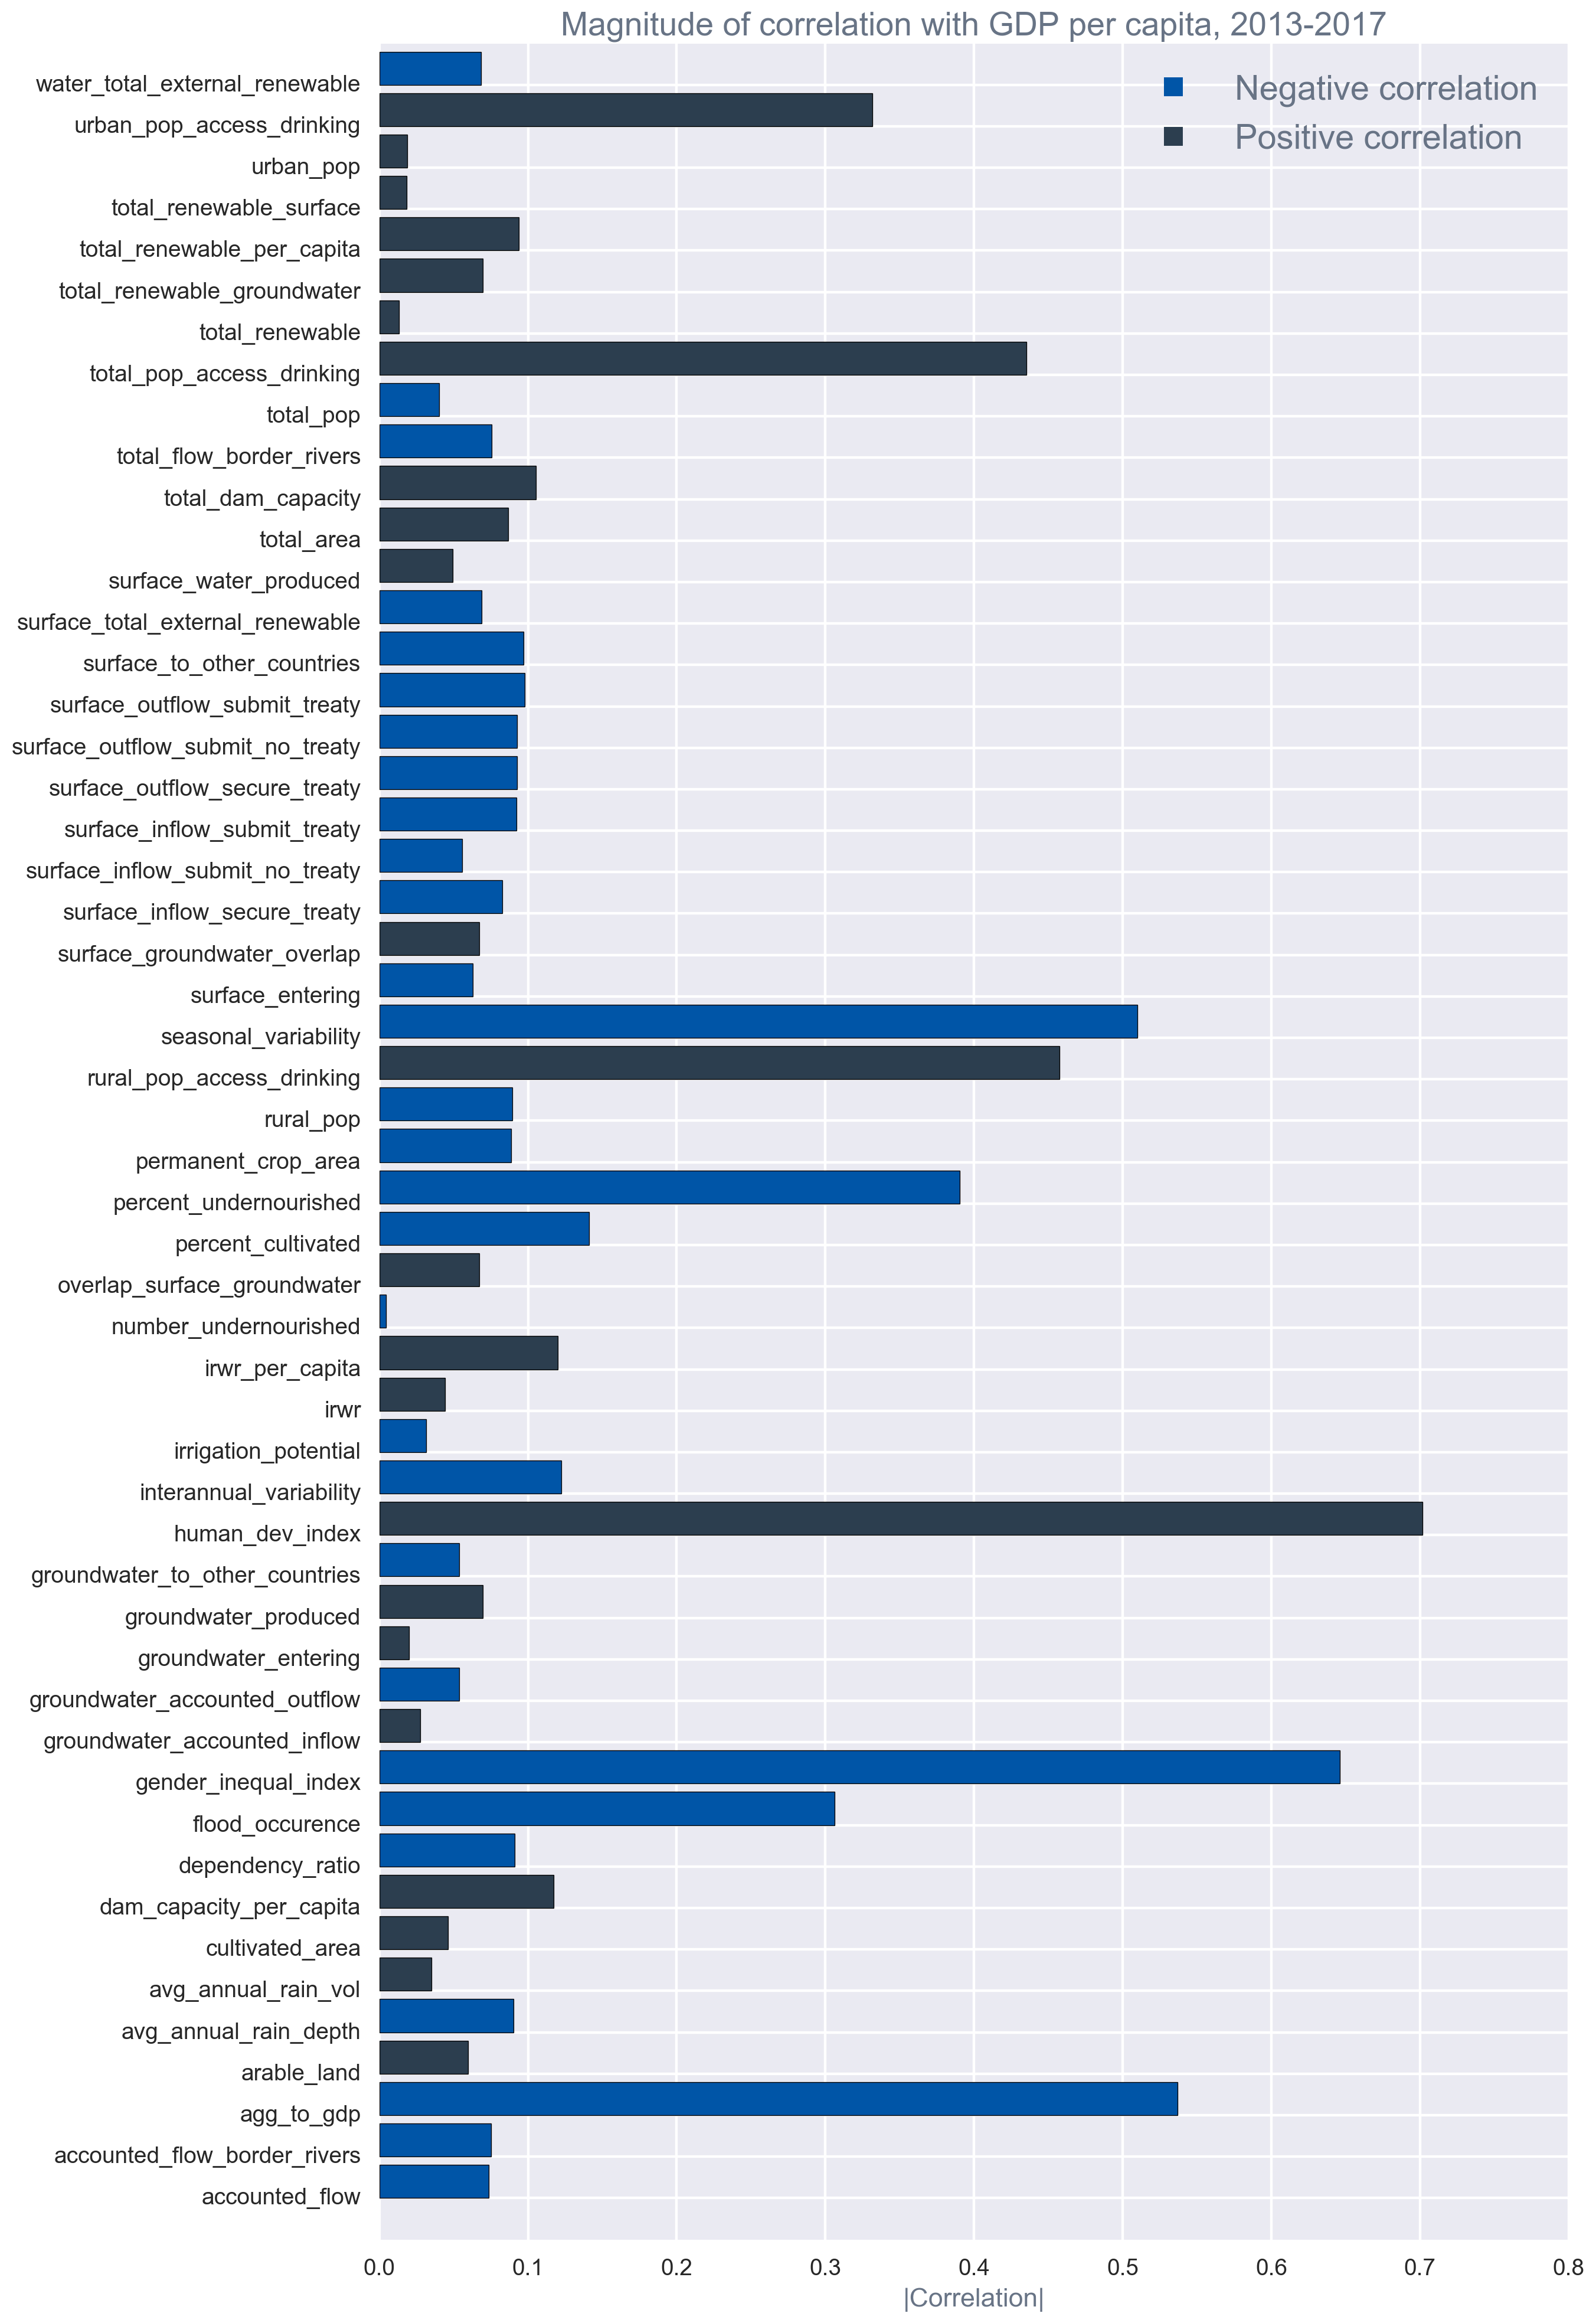

In [13]:
bar_colors = ['#0055A7' if x else '#2C3E4F' for x in list(recent_corr.values < 0)]
color_labels = {'#0055A7':'Negative correlation', '#2C3E4F':'Positive correlation'}

conditional_bar(recent_corr.apply(np.abs), bar_colors, color_labels,
               title='Magnitude of correlation with GDP per capita, 2013-2017',
               xlabel='|Correlation|')

# Target: GDP per capita, binned


While correlation is useful for assessing  relationships, it is limited to only *linear* relationships. As we have seen though, there seem to be many non-linear relationships. We could assess correlation for log transformed variables (see the extras below), but we still may have non-linear relationships. One way to address this is to bin variables into categories and look at the distribution of other variables for each category. 

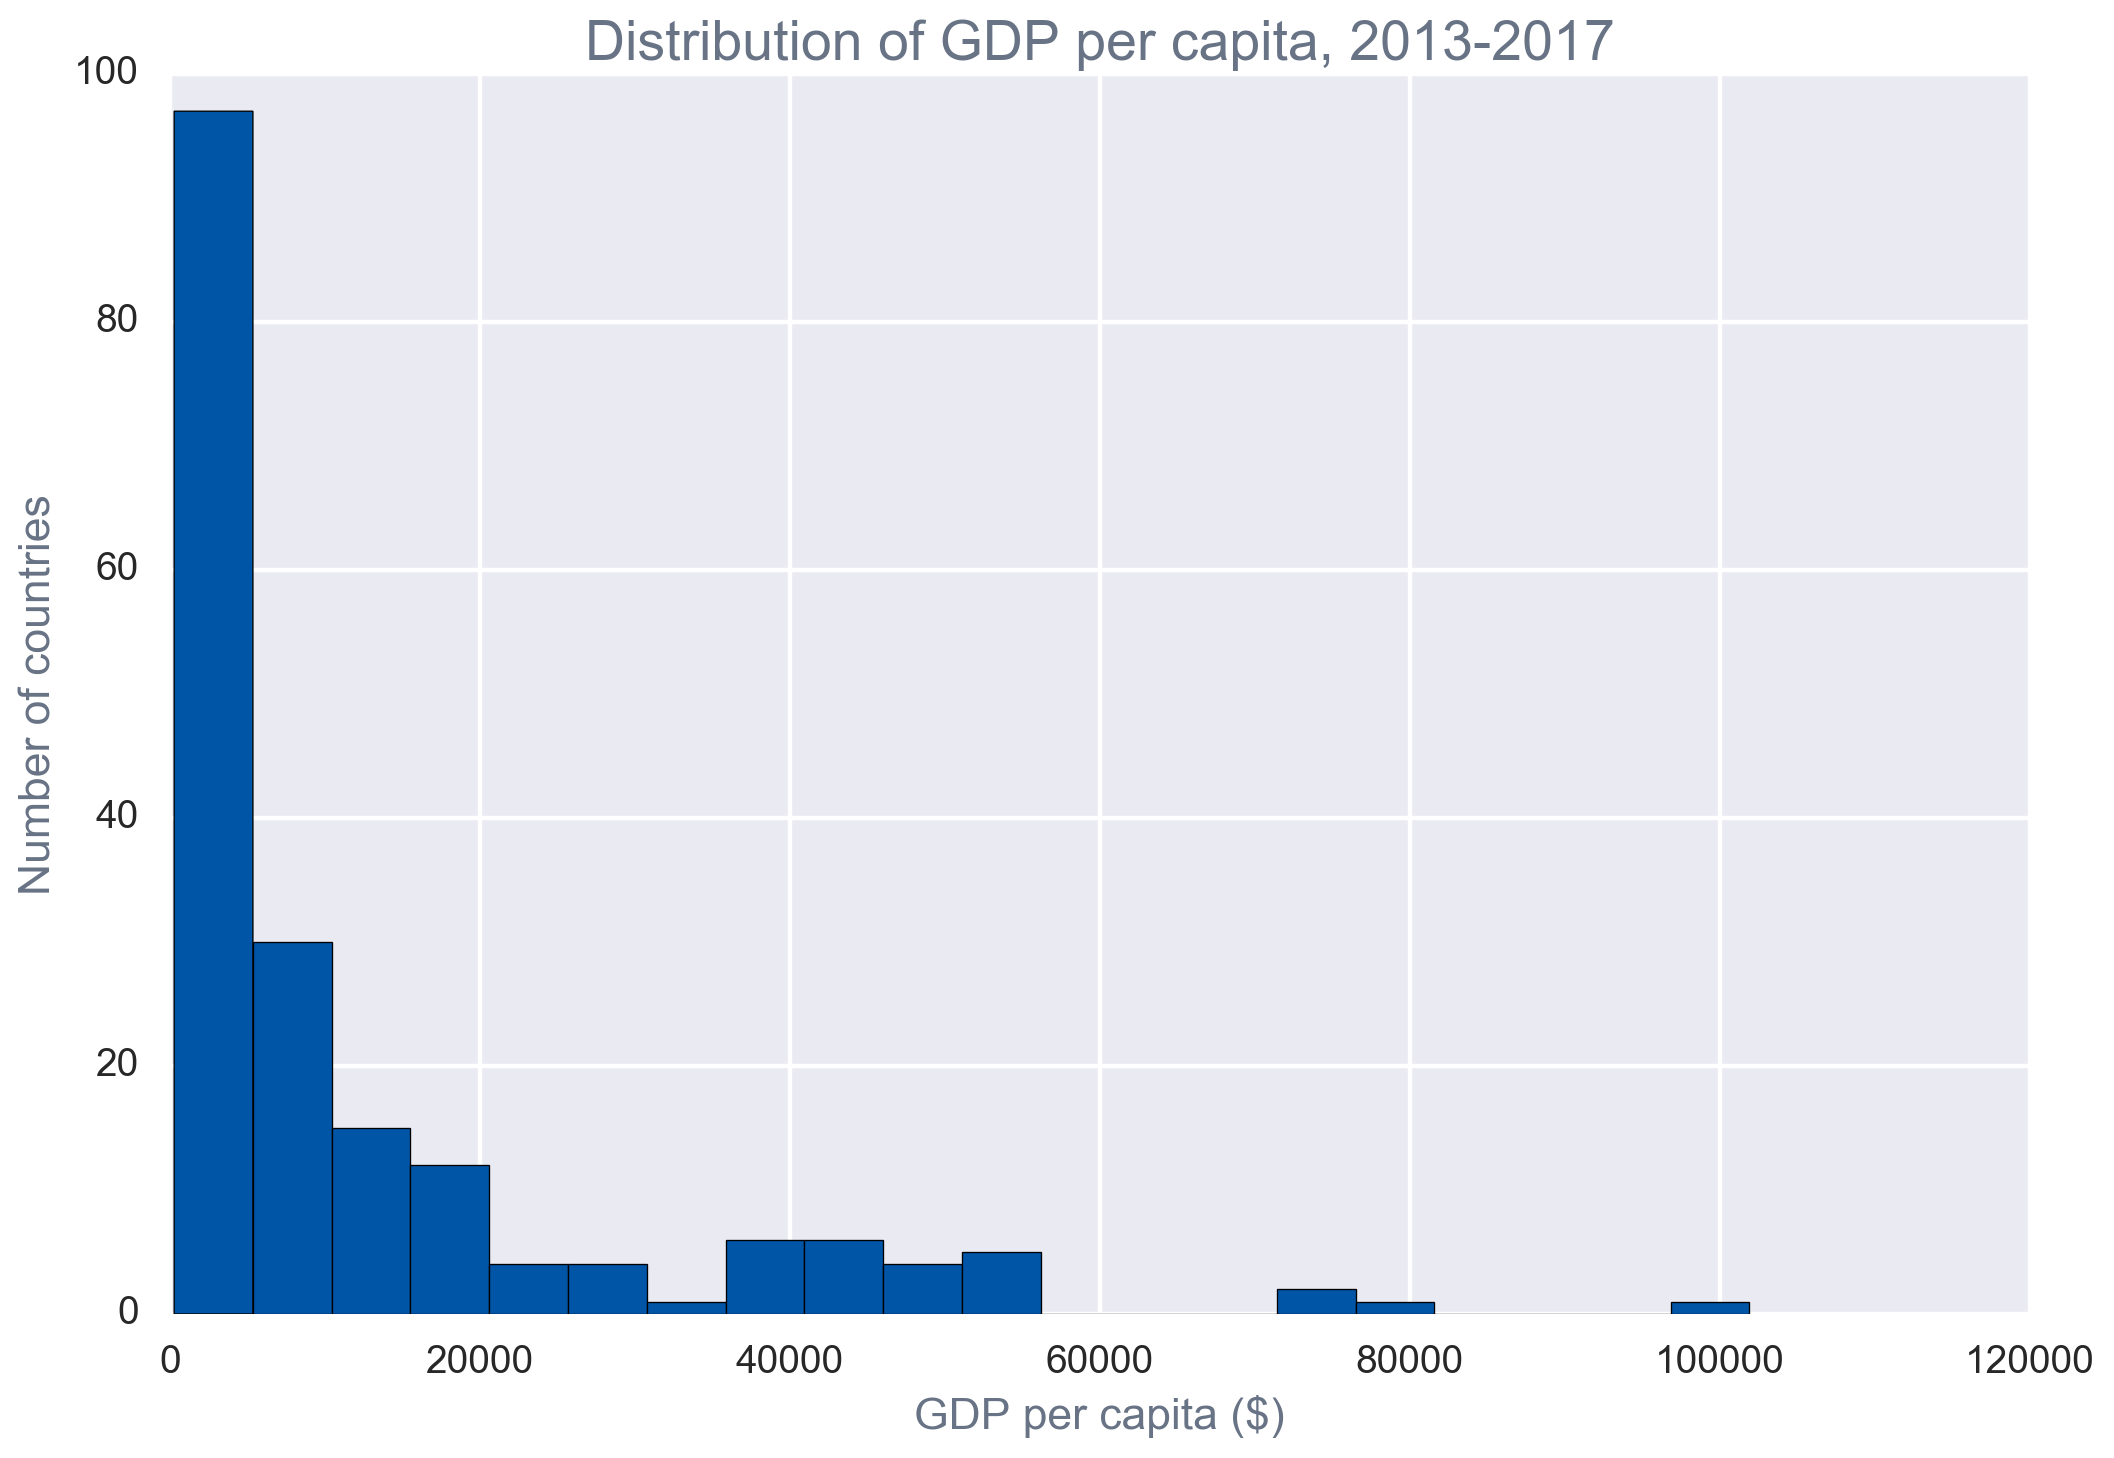

In [14]:
plot_hist(recent, 'gdp_per_capita', xlabel='GDP per capita ($)', 
         ylabel='Number of countries', 
          title='Distribution of GDP per capita, 2013-2017');

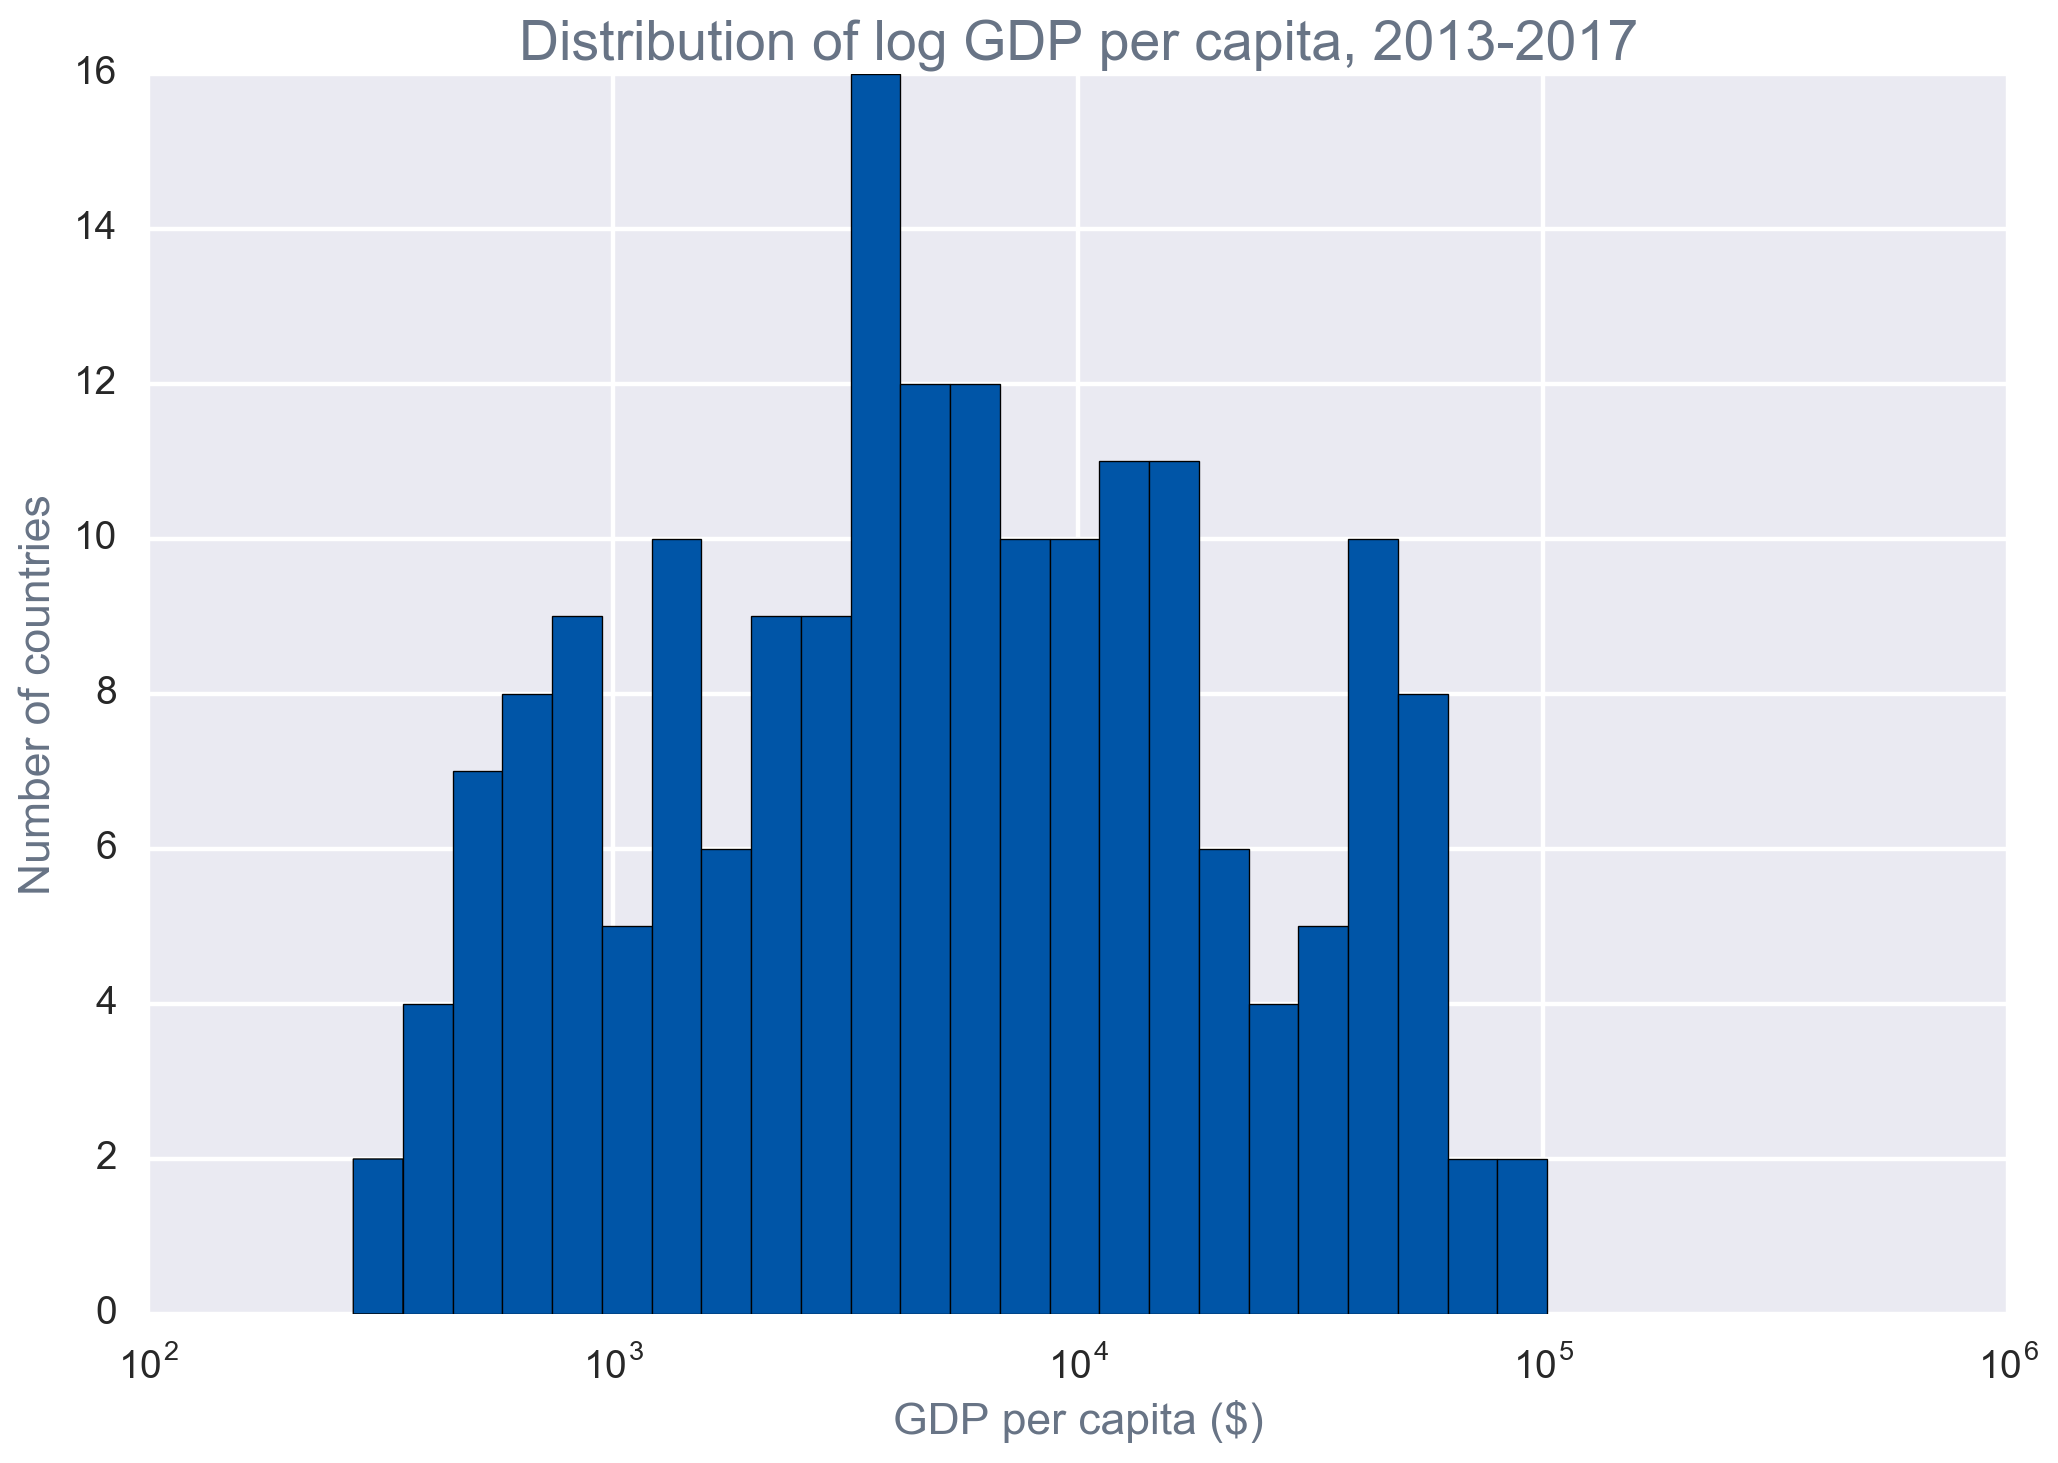

In [15]:
plot_hist(recent, 'gdp_per_capita', xlabel='GDP per capita ($)', logx=True, 
         ylabel='Number of countries', bins=25,
          title='Distribution of log GDP per capita, 2013-2017');

Let's look at `gdp_per_capita` binned into quintiles. 

In [16]:
capita_bins = ['Very low', 'Low', 'Medium', 'High', 'Very high']
recent['gdp_bin'] = pd.qcut(recent.gdp_per_capita, 5, capita_bins)
bin_ranges = pd.qcut(recent.gdp_per_capita, 5).unique()

Let's take our histogram function from before and add in the ability to color by category. 

In [17]:
def plot_hist(df, variable, bins=None, xlabel=None, by=None,
              ylabel=None, title=None, logx=False, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(12, 8))
    if logx:
        bins = np.logspace(np.log10(df[variable].min()),
                           np.log10(df[variable].max()), bins)
        ax.set_xscale("log")

    if by:
        if type(df[by].unique()) == pd.core.categorical.Categorical:
            cats = df[by].unique().categories.tolist()
        else:
            cats = df[by].unique().tolist()

        for cat in cats:
            to_plot = df[df[by] == cat][variable].dropna()
            ax.hist(to_plot, bins=bins);
    else:
        ax.hist(df[variable].dropna().values, bins=bins);

    if xlabel:
        ax.set_xlabel(xlabel);
    if ylabel:
        ax.set_ylabel(ylabel);
    if title:
        ax.set_title(title);

    return ax

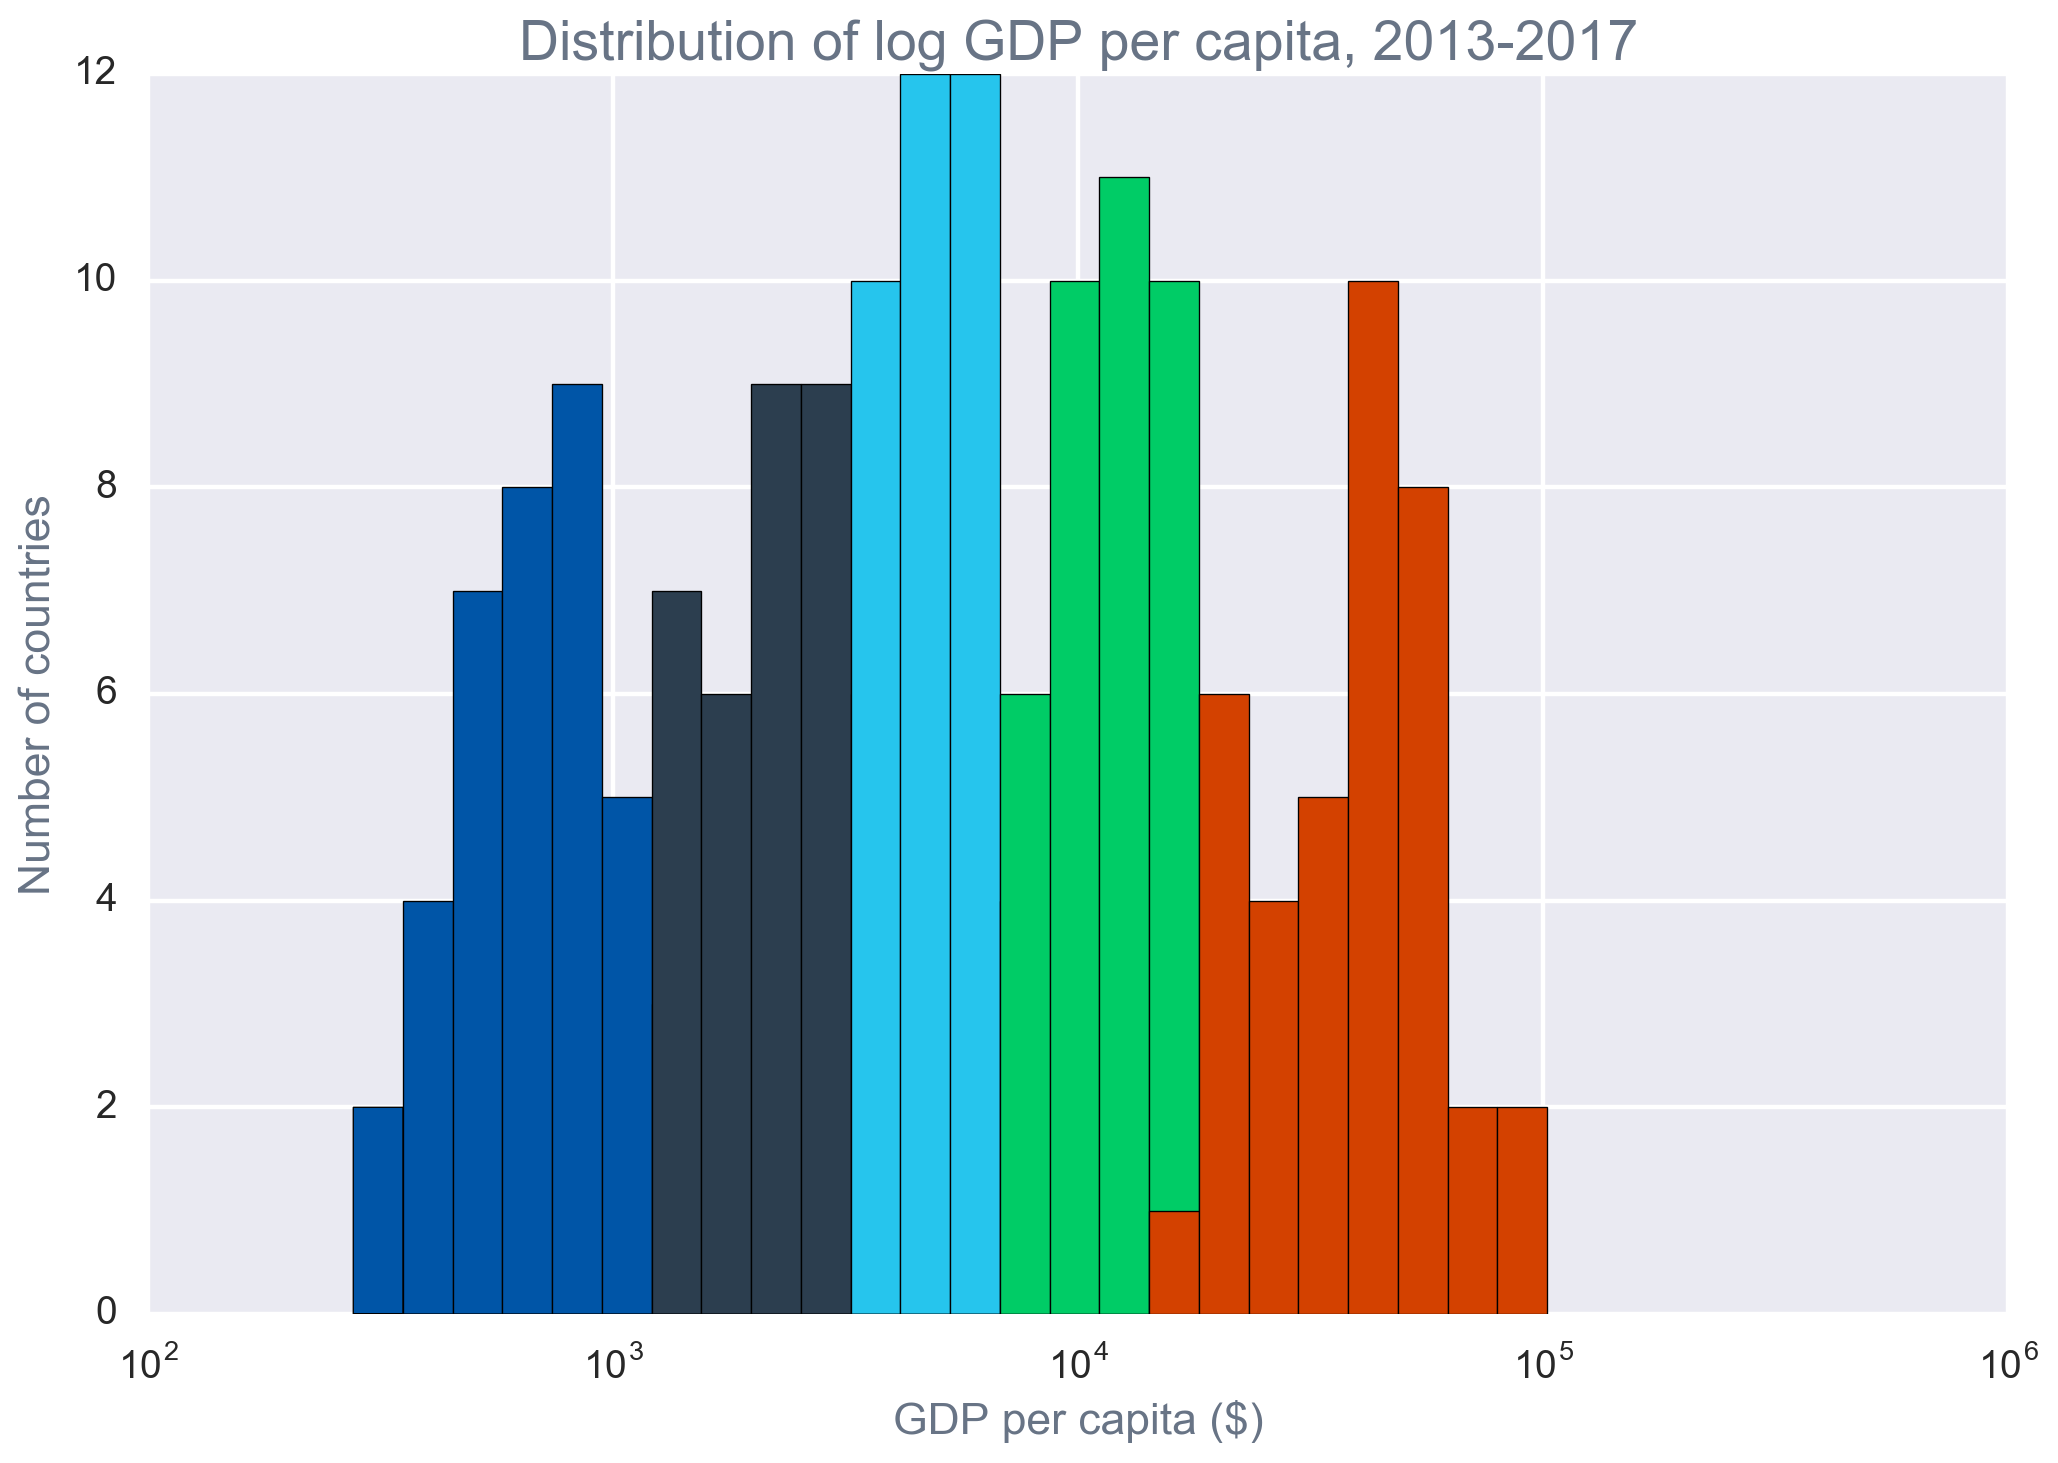

In [18]:
plot_hist(recent, 'gdp_per_capita', xlabel='GDP per capita ($)', logx=True, 
         ylabel='Number of countries', bins=25, by='gdp_bin',
          title='Distribution of log GDP per capita, 2013-2017')

Now we have a CATEGORICAL X CONTINUOUS analysis. Let's look at the distribution of a few variables for each gdp group. 

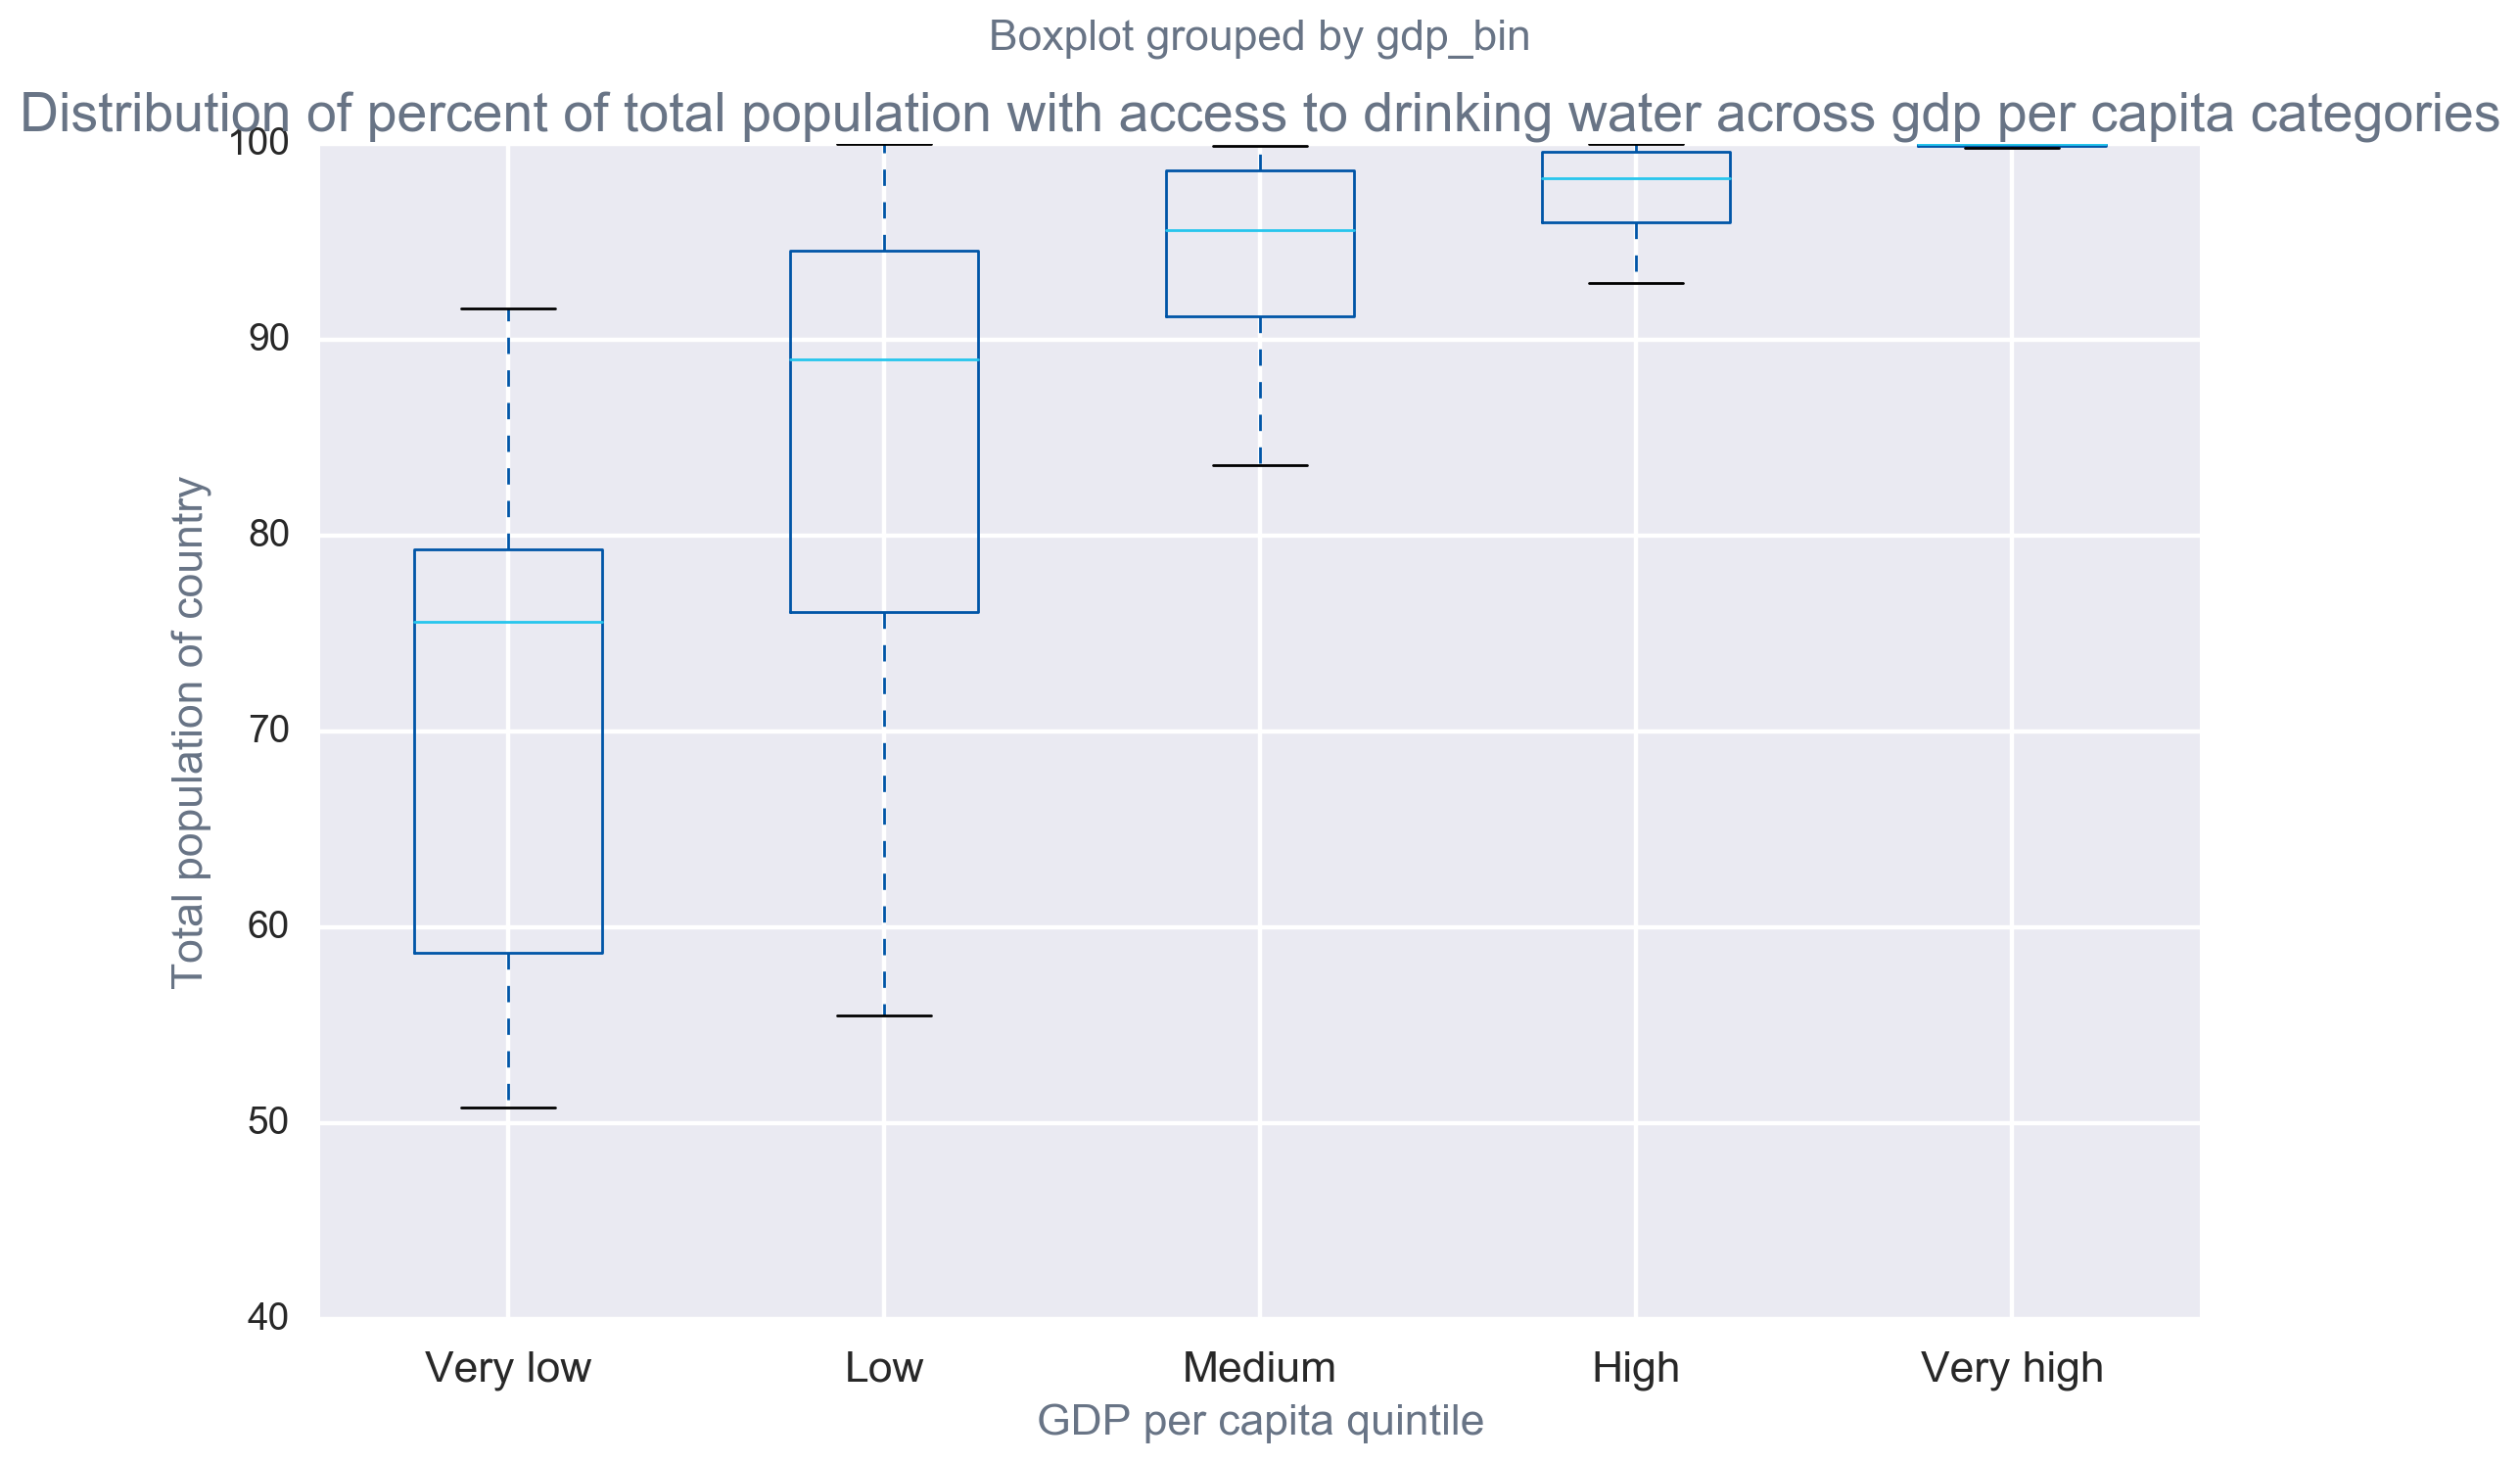

In [19]:
recent[['gdp_bin','total_pop_access_drinking']].boxplot(by='gdp_bin');
# plt.ylim([0,100000]);
plt.title('Distribution of percent of total population with access to drinking water across gdp per capita categories');
plt.xlabel('GDP per capita quintile');
plt.ylabel('Total population of country');

In [20]:
def mult_boxplots(df, variable, category, 
                  xlabel=None, ylabel=None, title=None,
                  ylim=None):
    df[[variable, category]].boxplot(by=category);
    
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if title:
        plt.title(title);
    if ylim:
        plt.ylim(ylim);

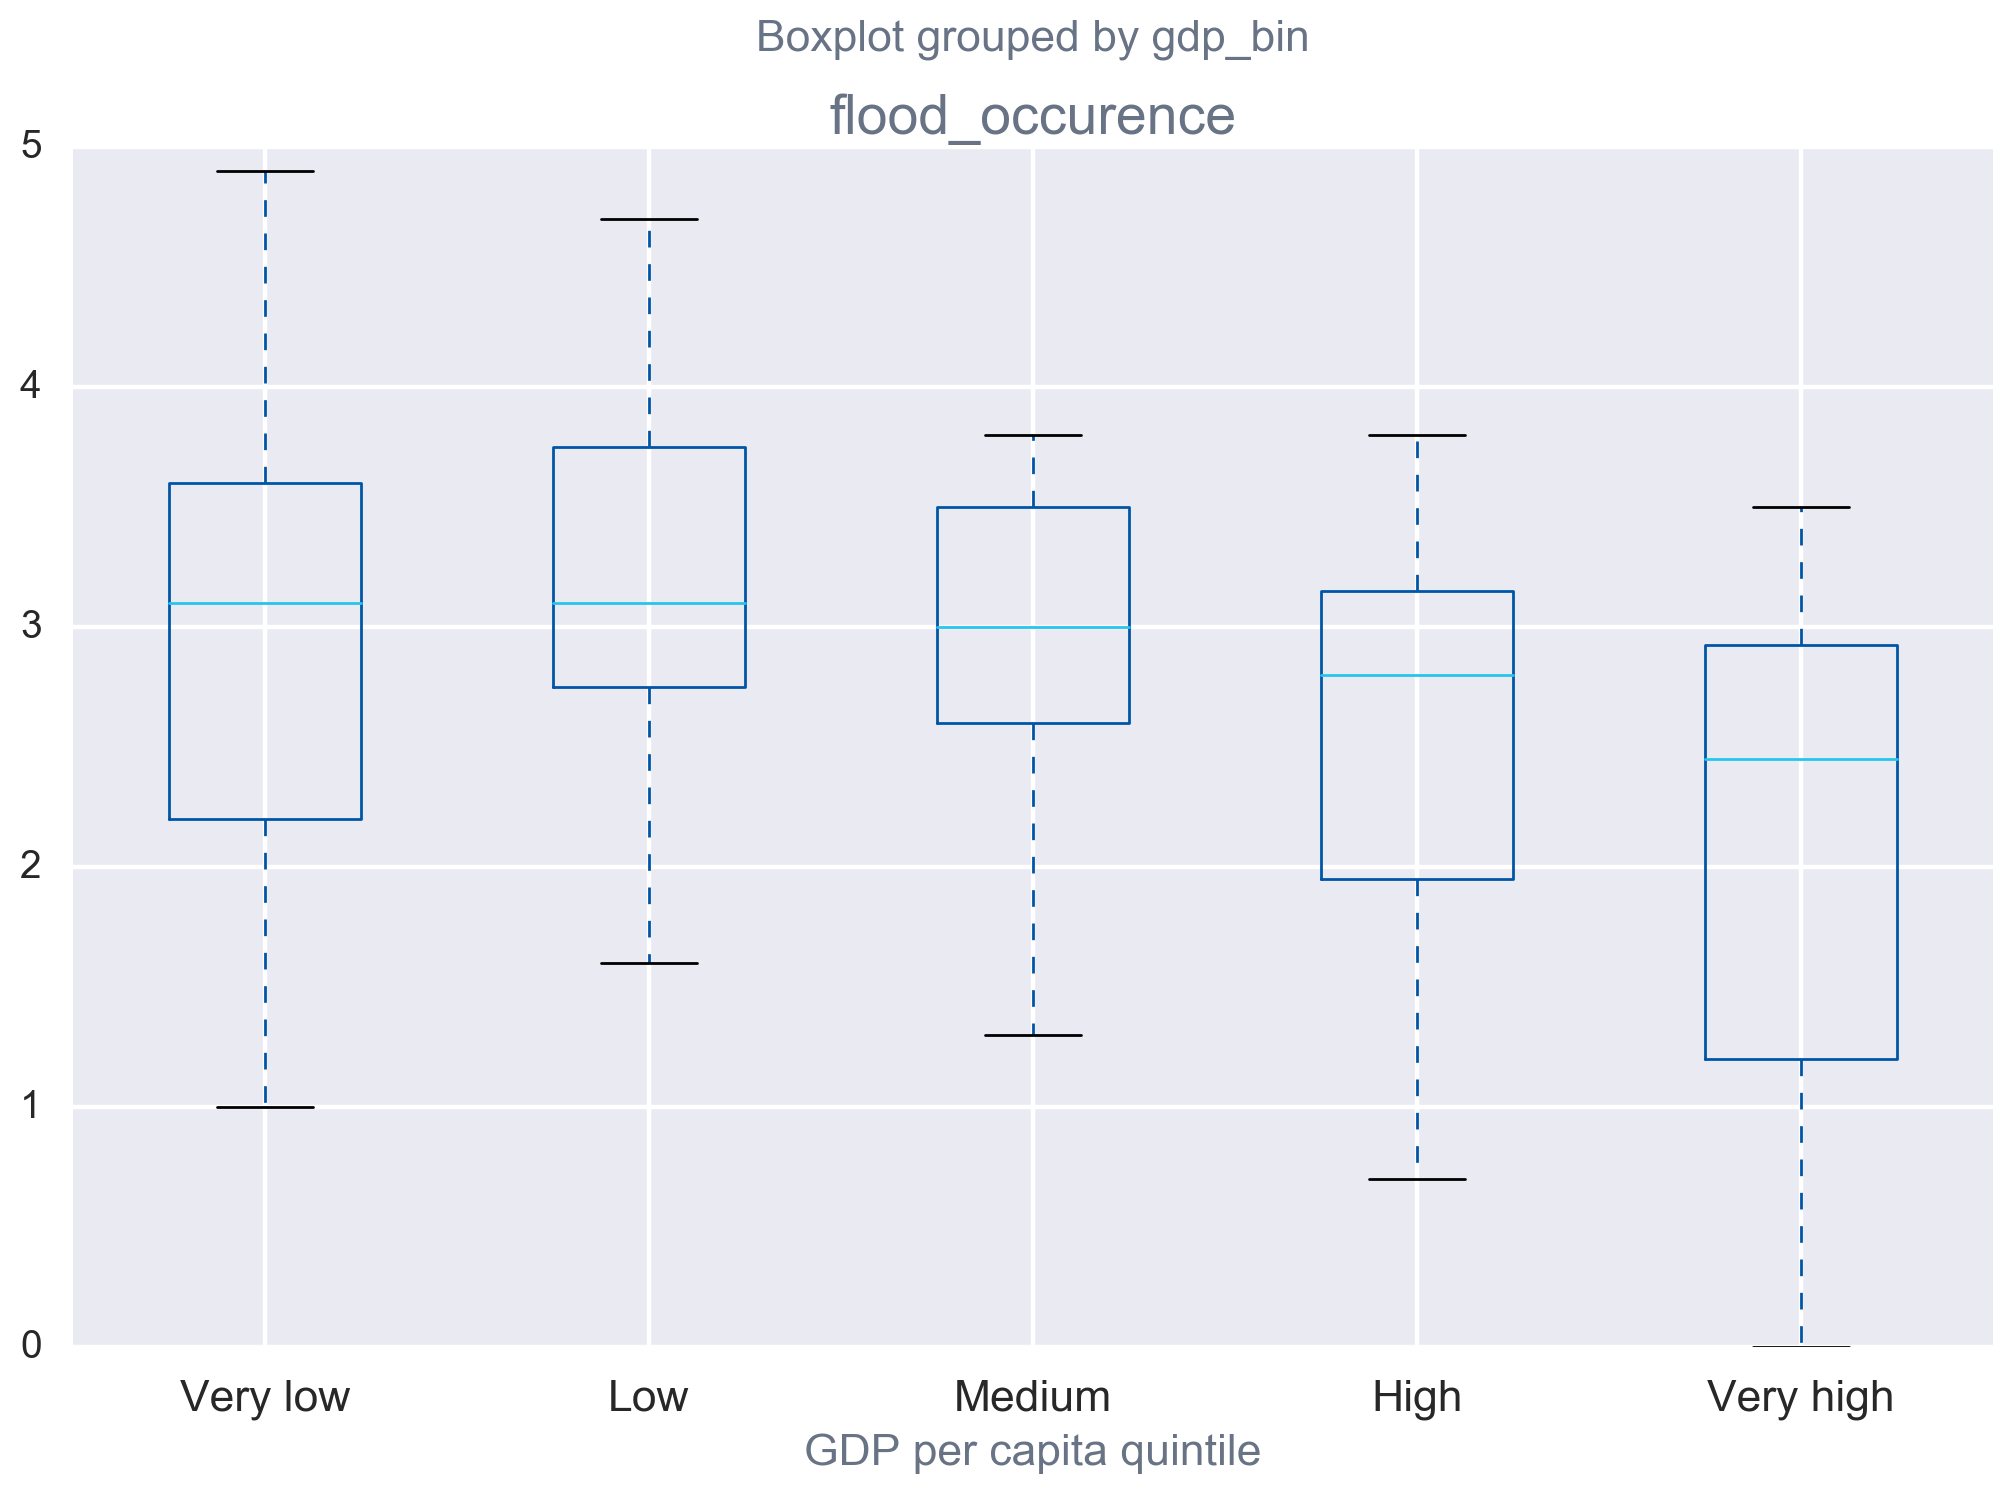

In [21]:
mult_boxplots(recent, 'flood_occurence', 'gdp_bin',
             xlabel='GDP per capita quintile')

## Dealing with lots of variables

We have a lot of variables - which should we look at? 

### Ranking by f-value

**Note**, assumptions of f-test are not necessarily valid but we are only using this as a guide for which variables to look at first, not to reject a hypothesis

In [22]:
cat = 'gdp_bin'
cat_no_bin = 'gdp_per_capita'
fps = []
for var in recent.columns.tolist():
    if var != cat and var != cat_no_bin:
        gb = recent[[var, cat]].dropna().groupby(cat)
        f, p = scipy.stats.f_oneway(*gb[var].apply(list).values.tolist())
        fps.append([var, f, p])    

fps = pd.DataFrame(fps, 
                   columns=['variable','f','p']).sort_values('f', 
                                                             ascending=False)

In [23]:
fps.head()

,variable,f,p
17,human_dev_index,234.618336,4.952986e-70
2,agg_to_gdp,94.414789,2.692111e-41
11,gender_inequal_index,61.450716,1.183911e-30
45,total_pop_access_drinking,39.077823,2.766087e-23
28,rural_pop_access_drinking,36.193797,6.254604e-22


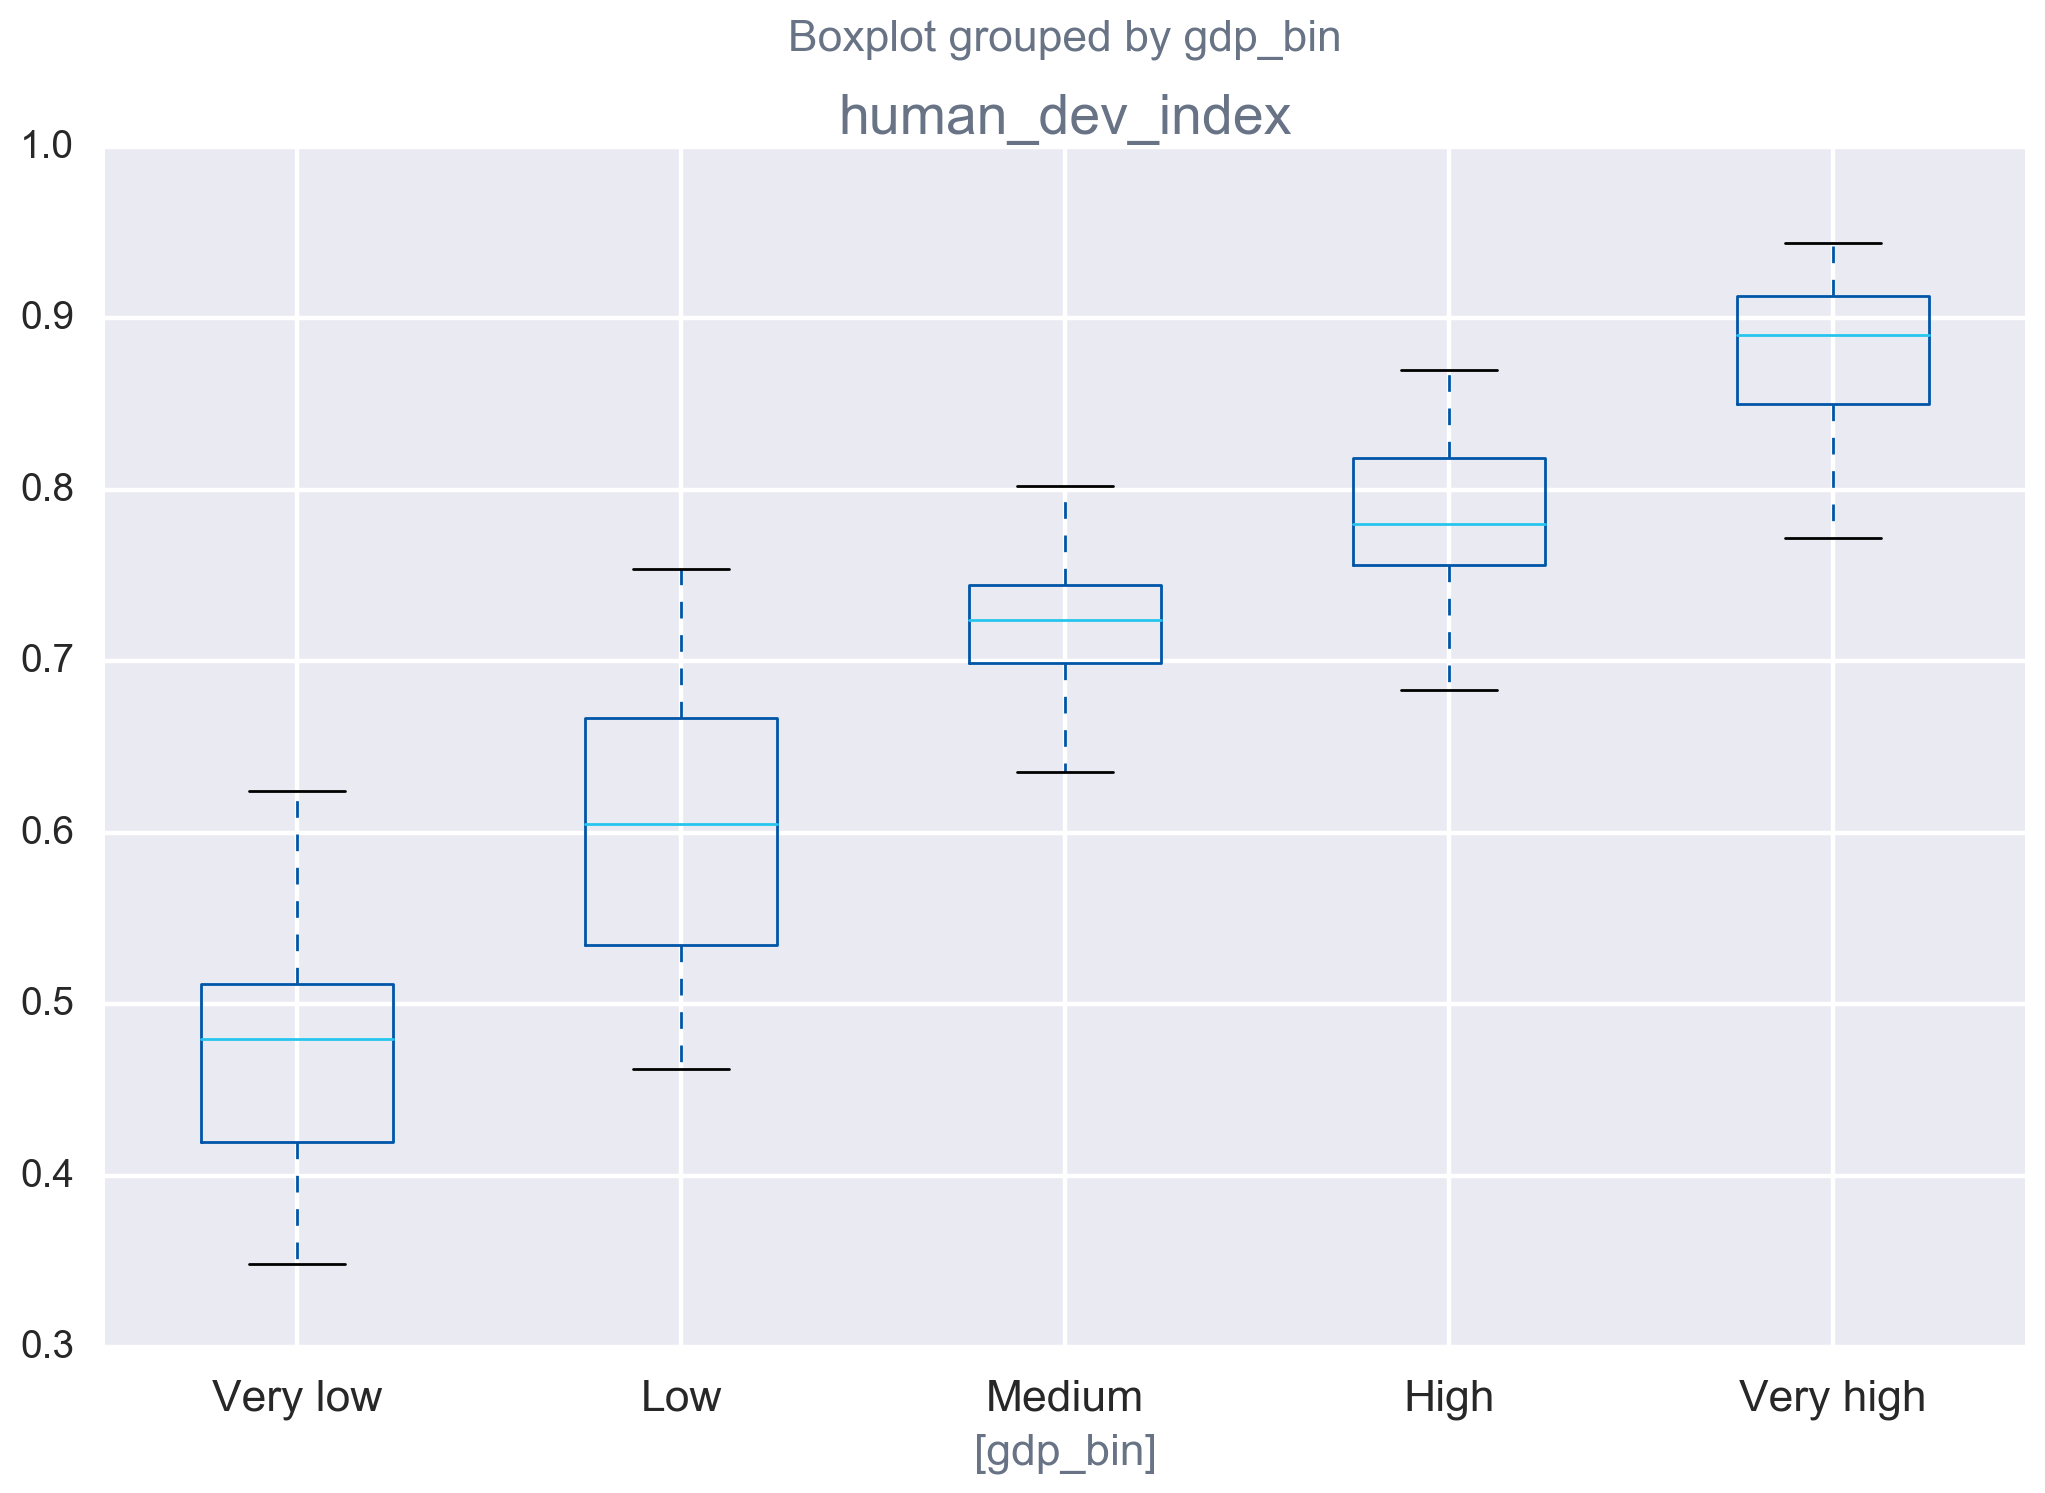

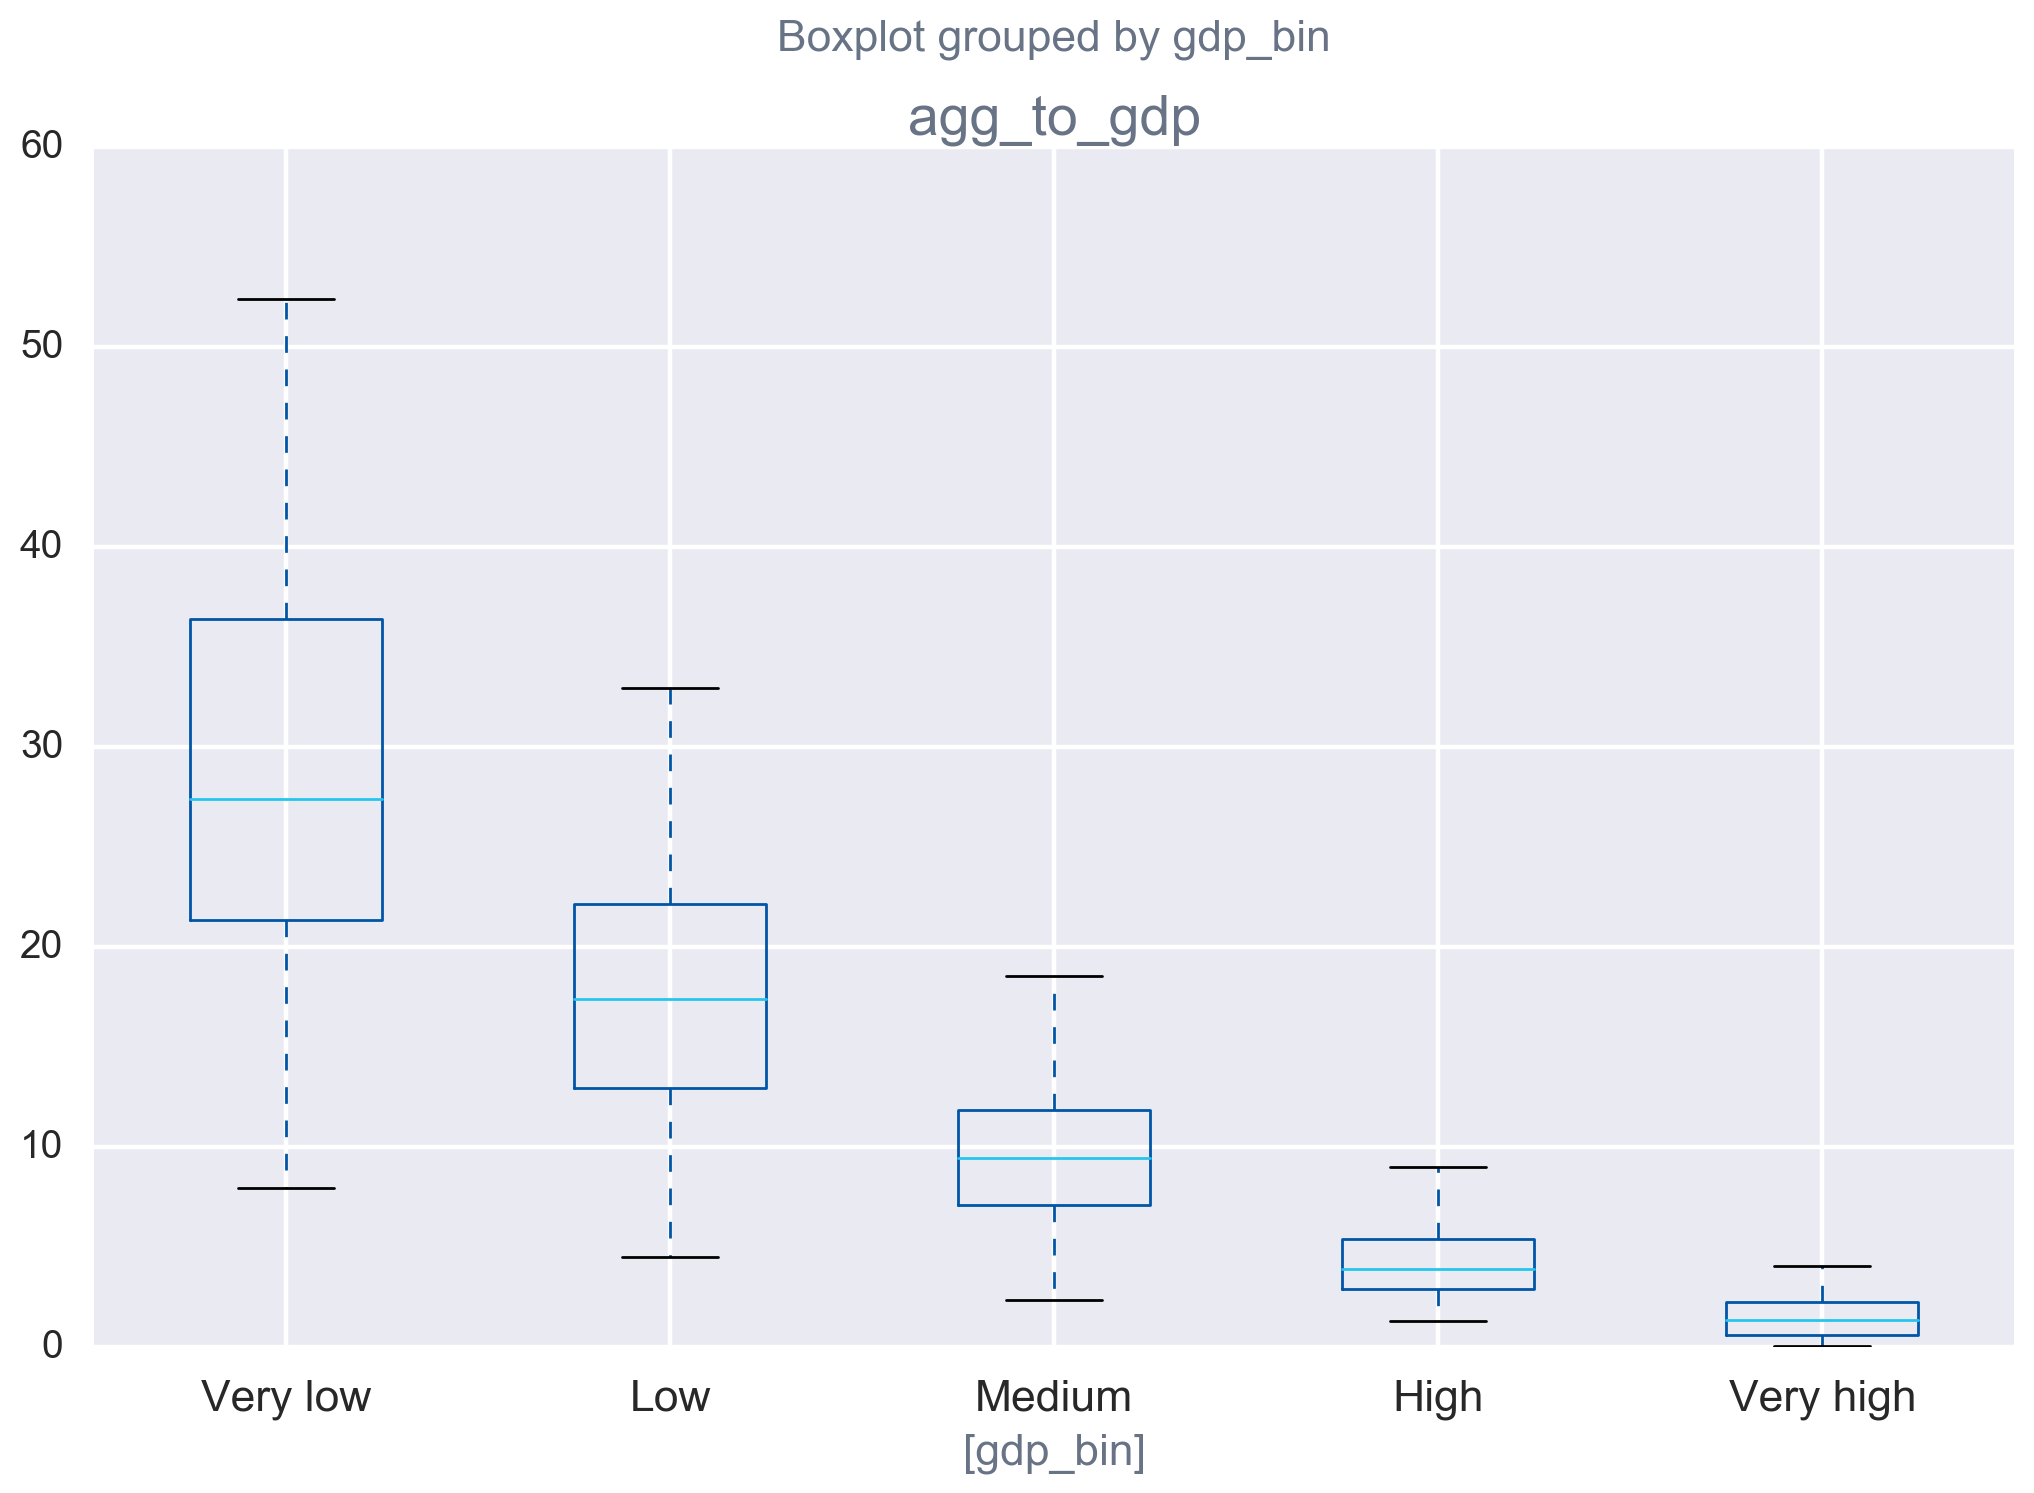

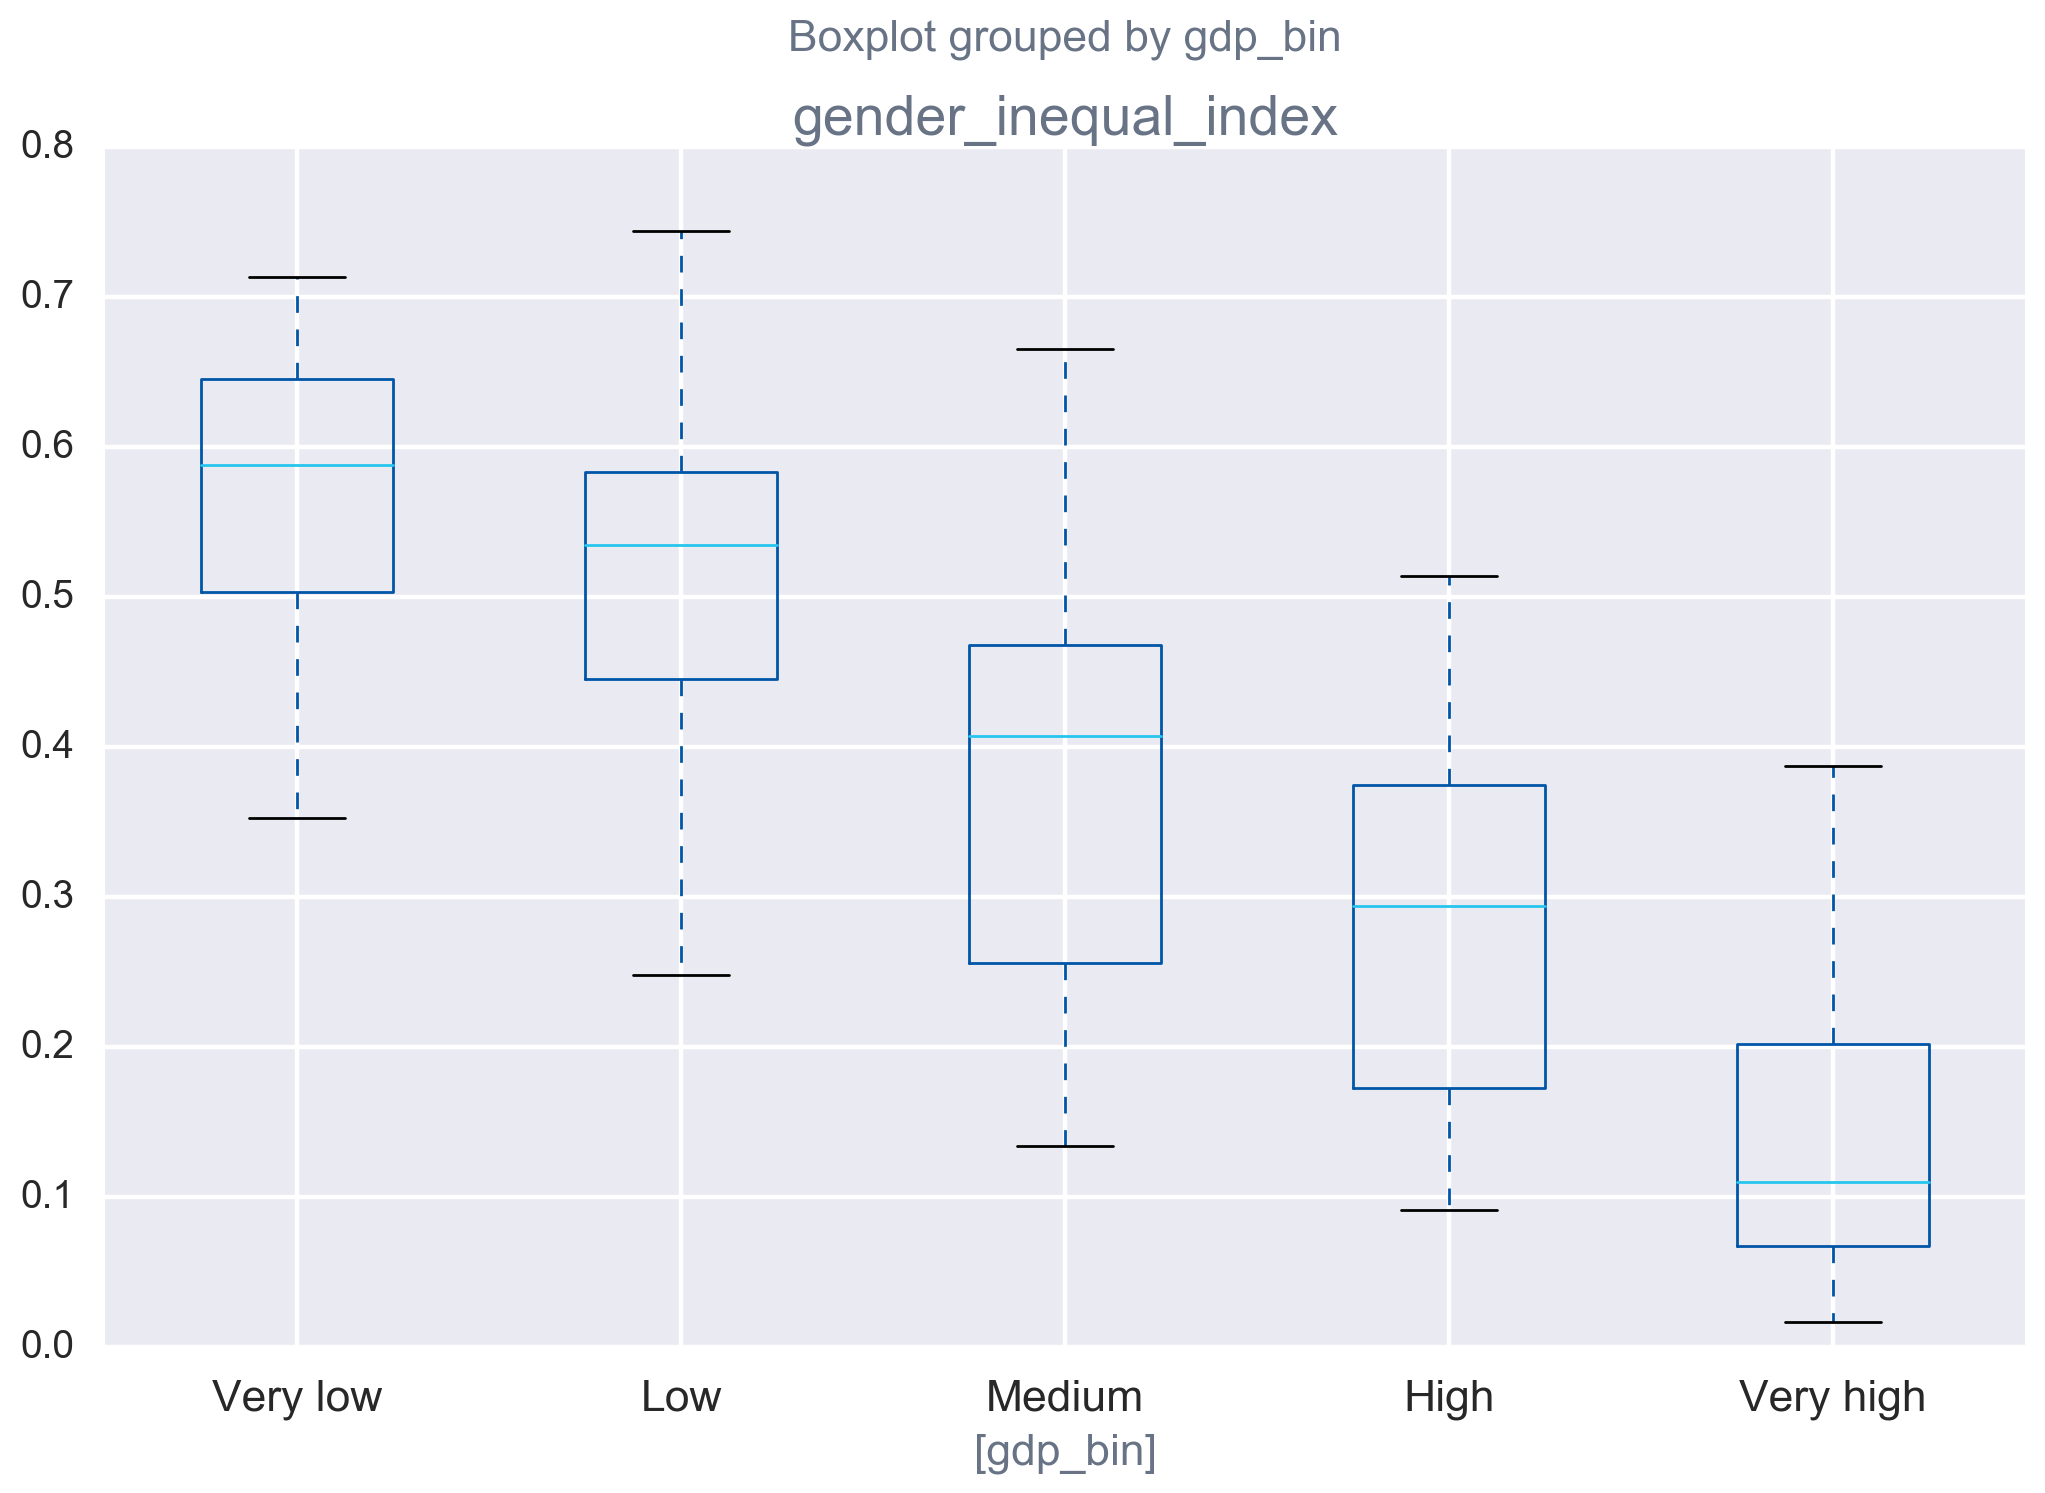

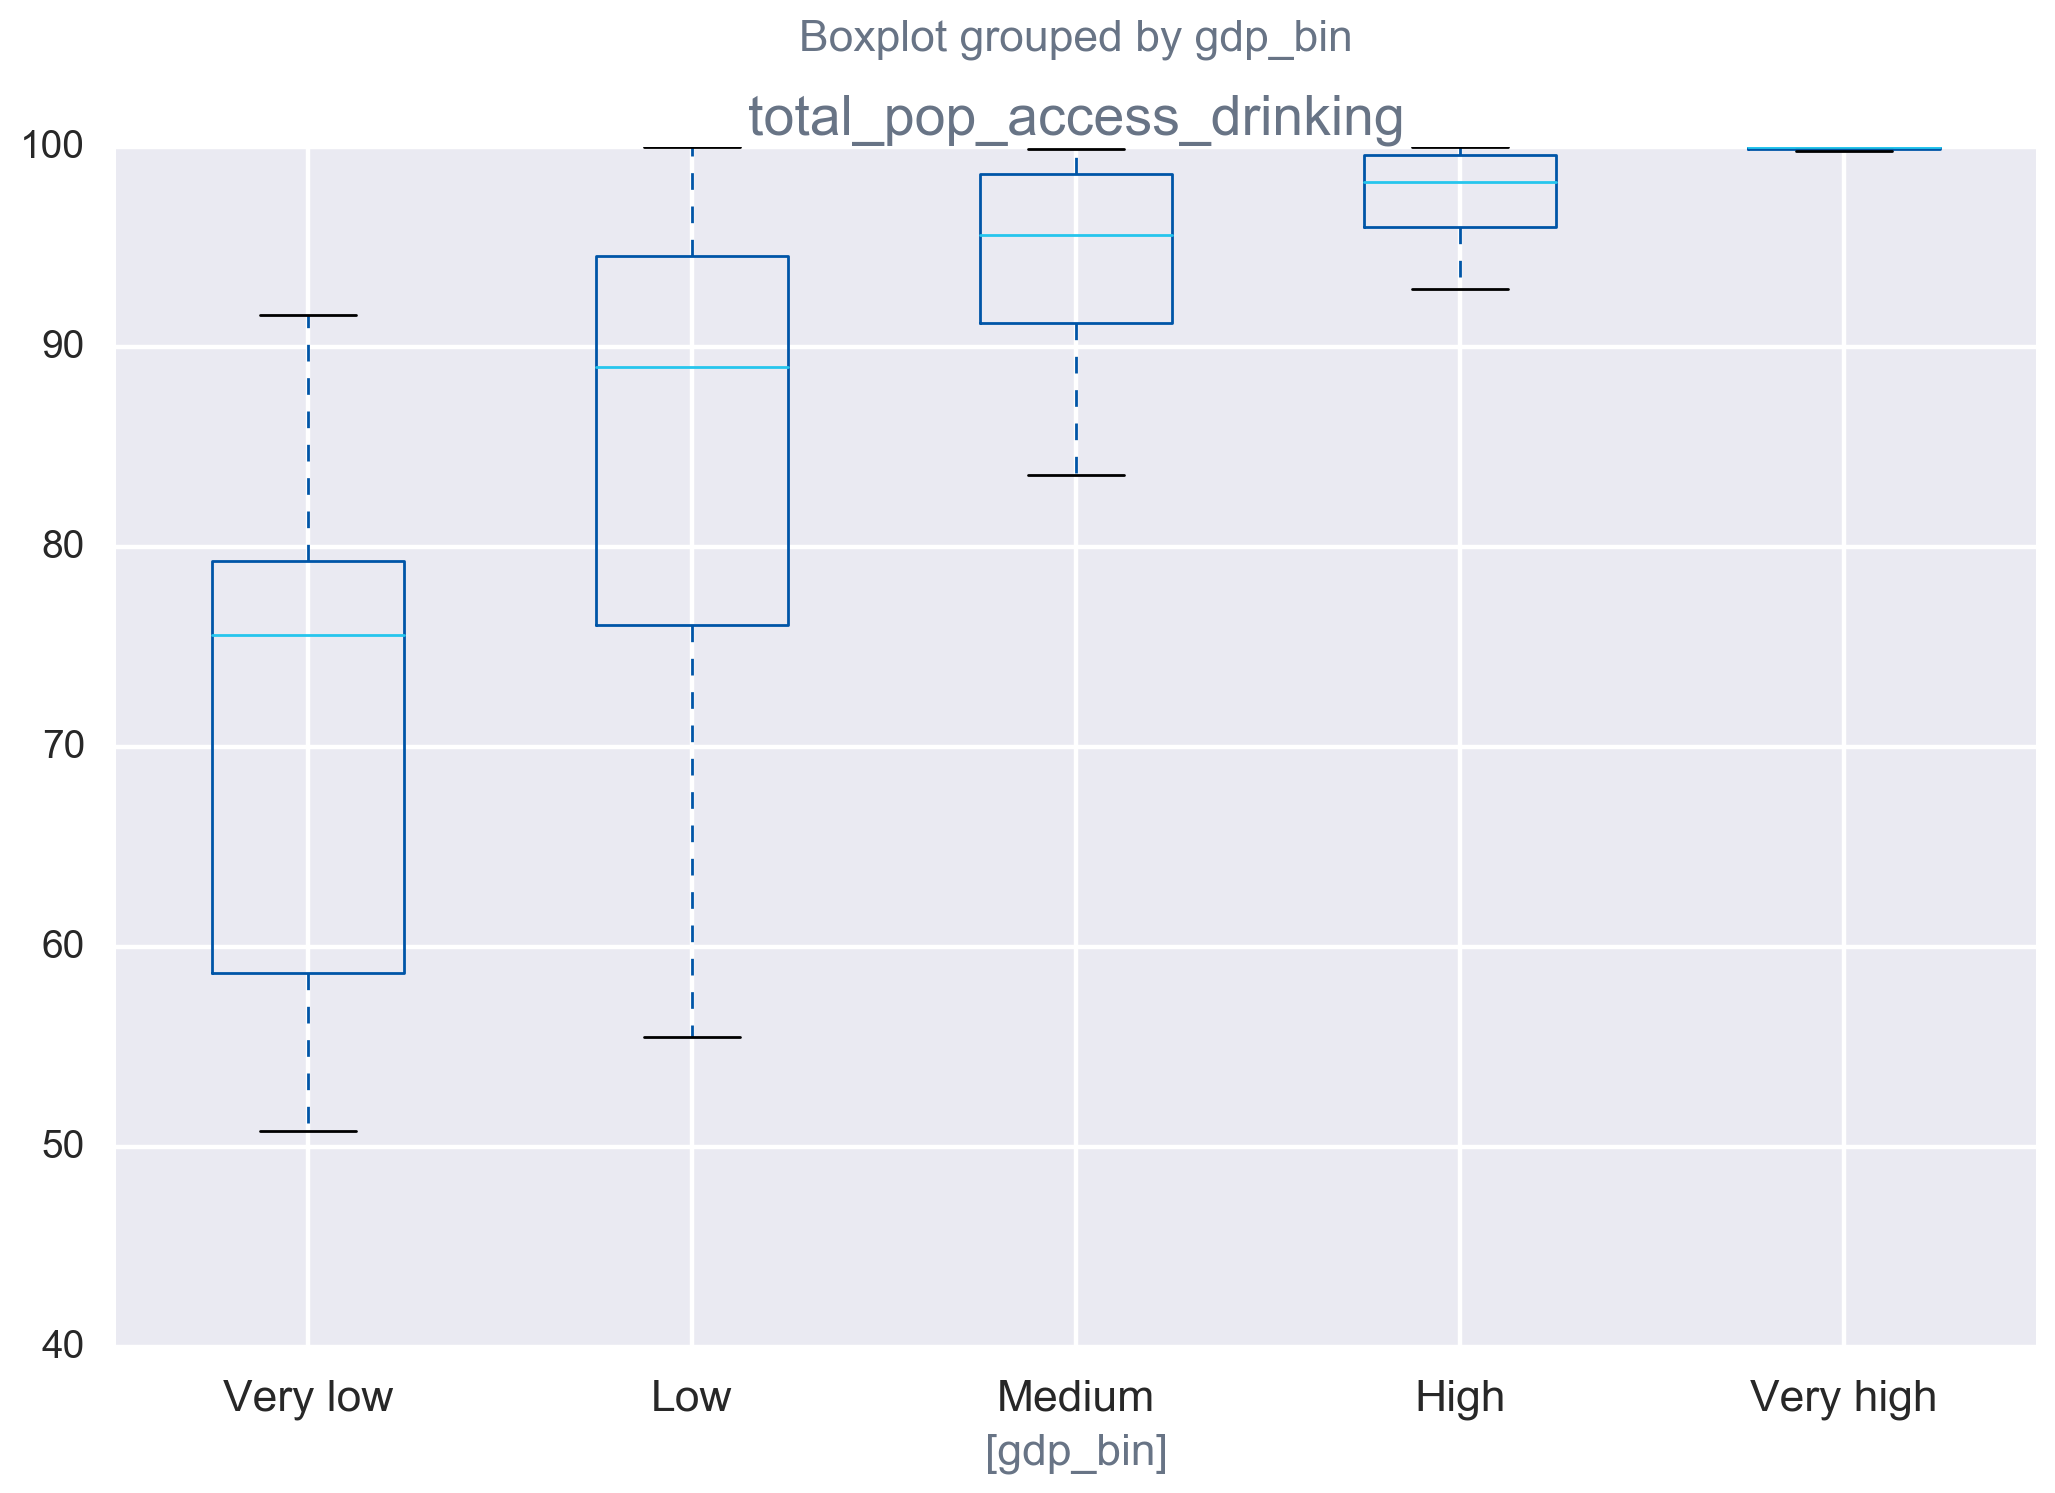

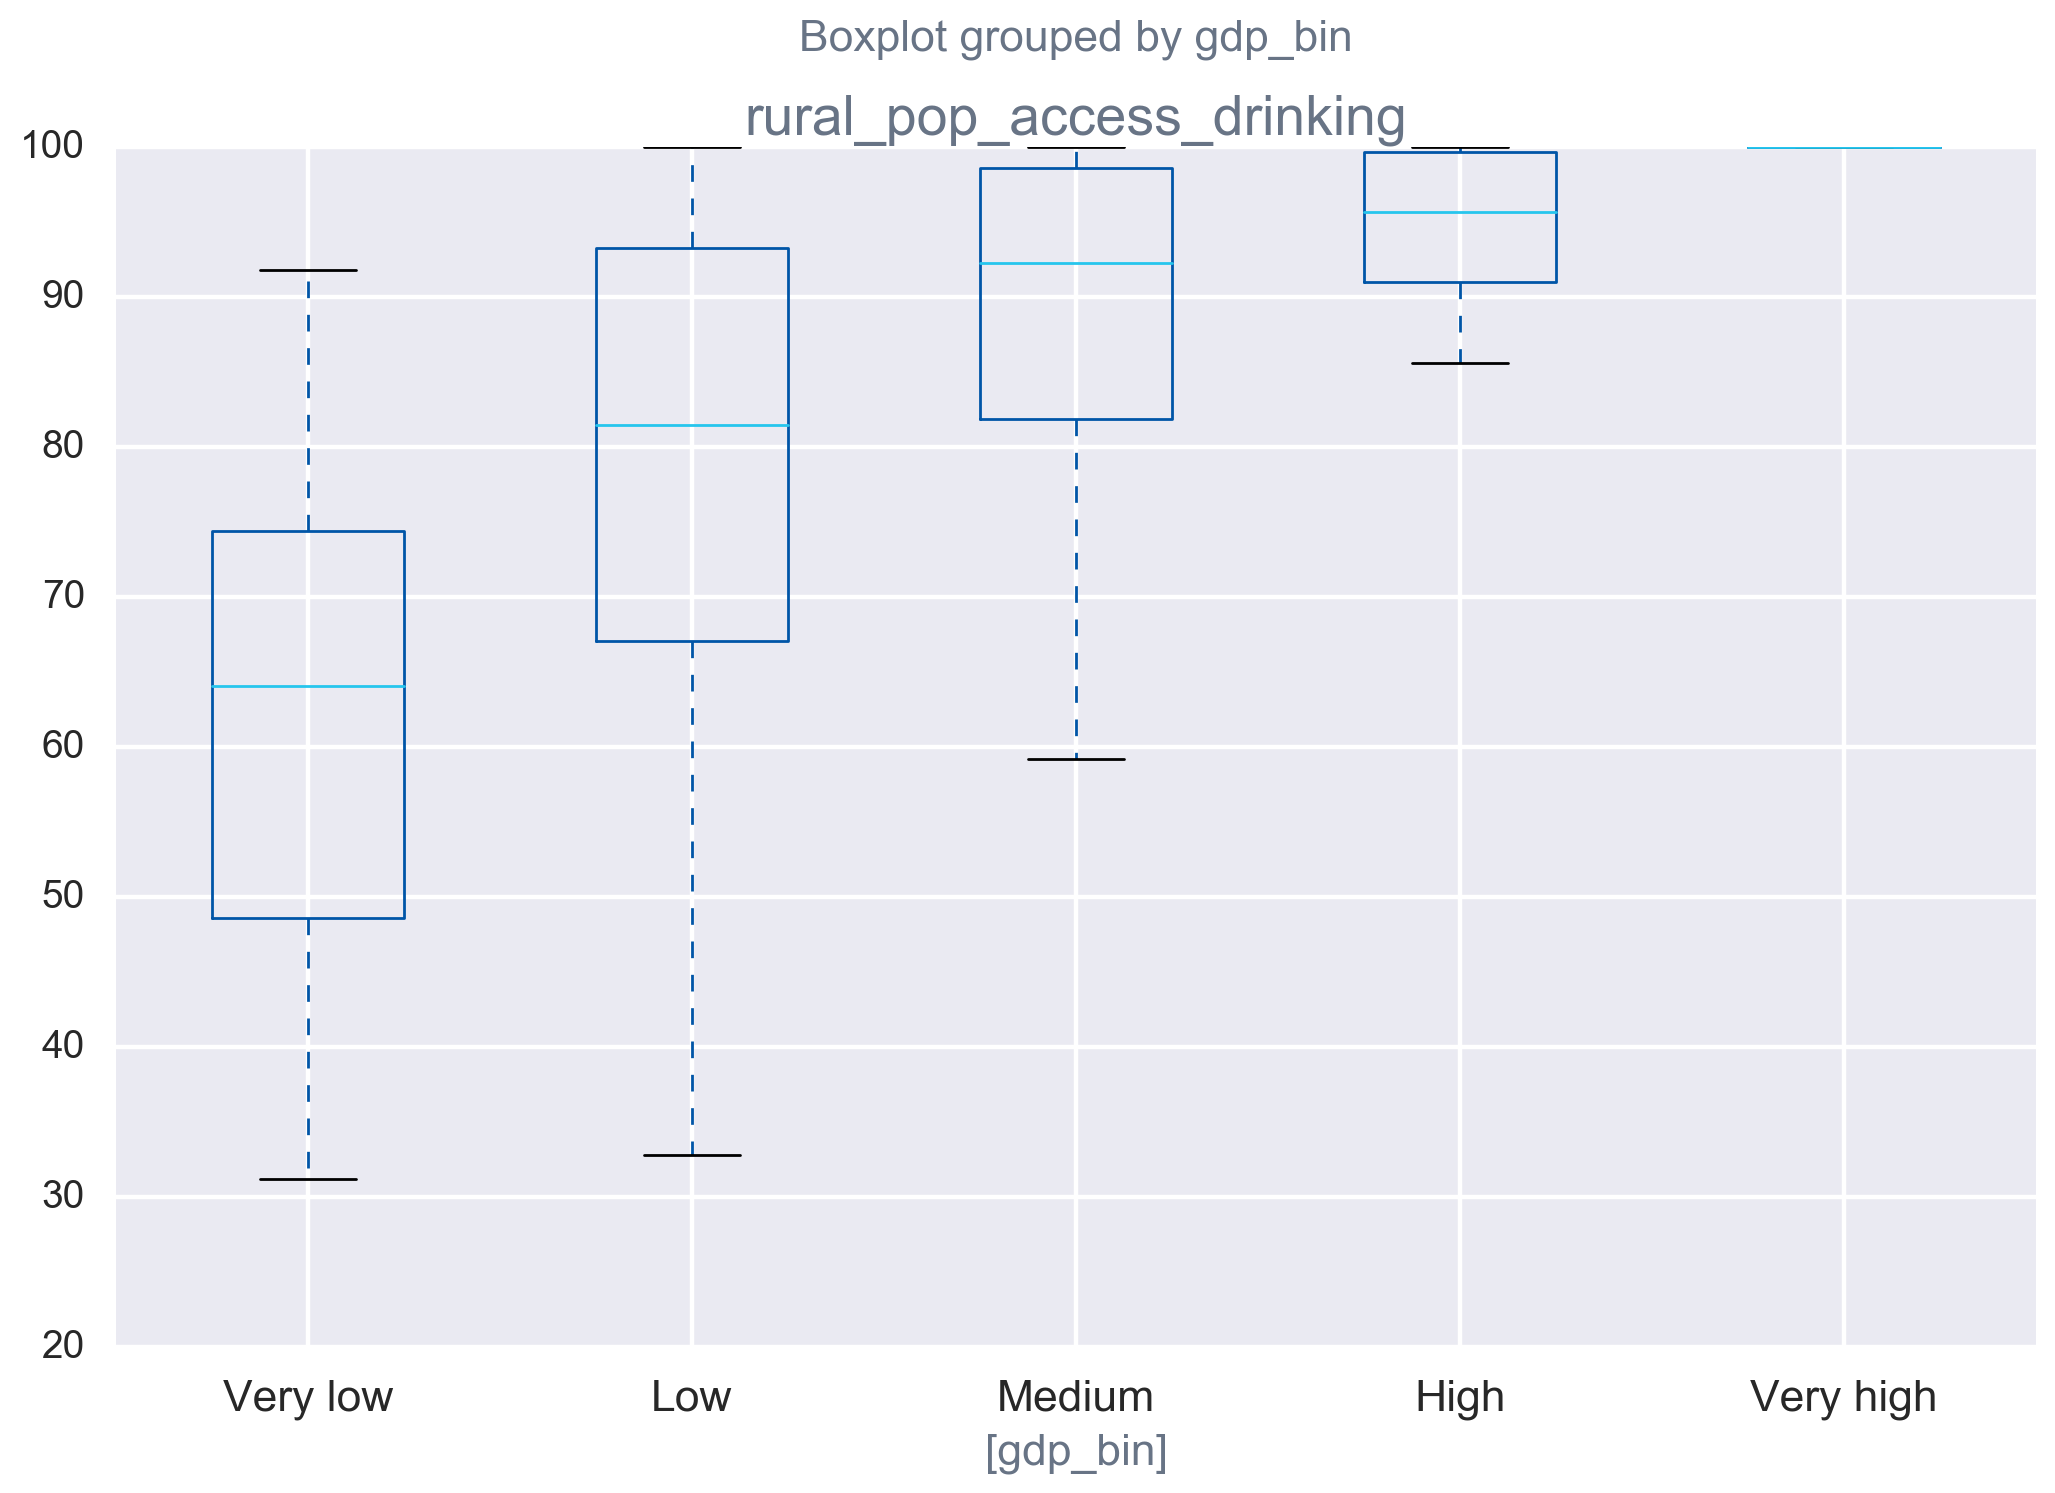

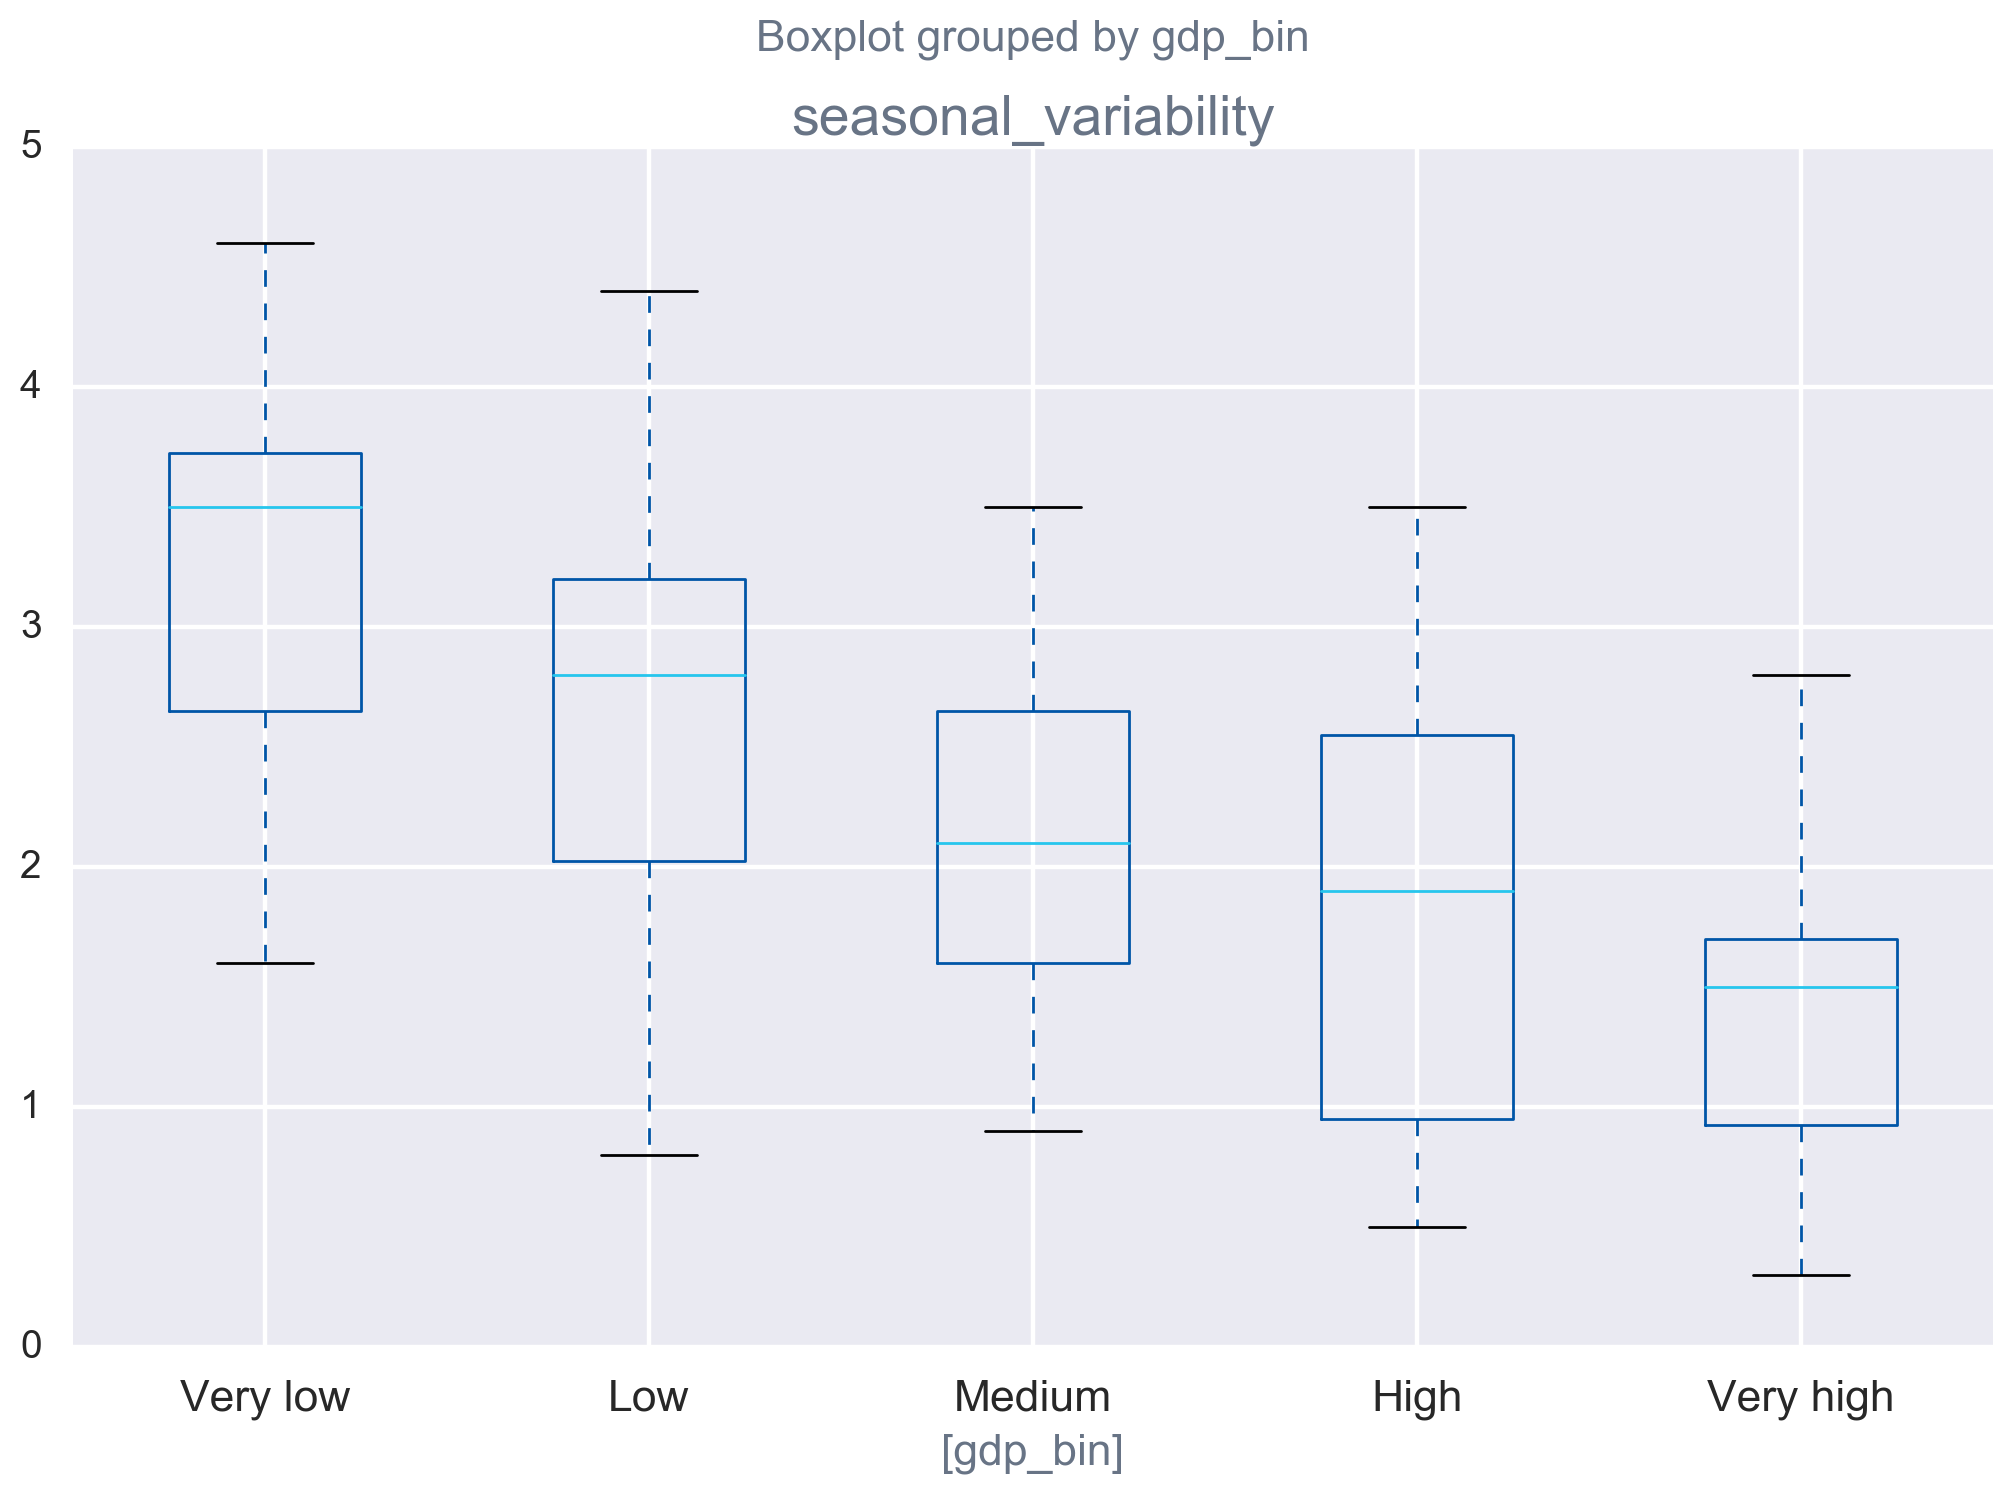

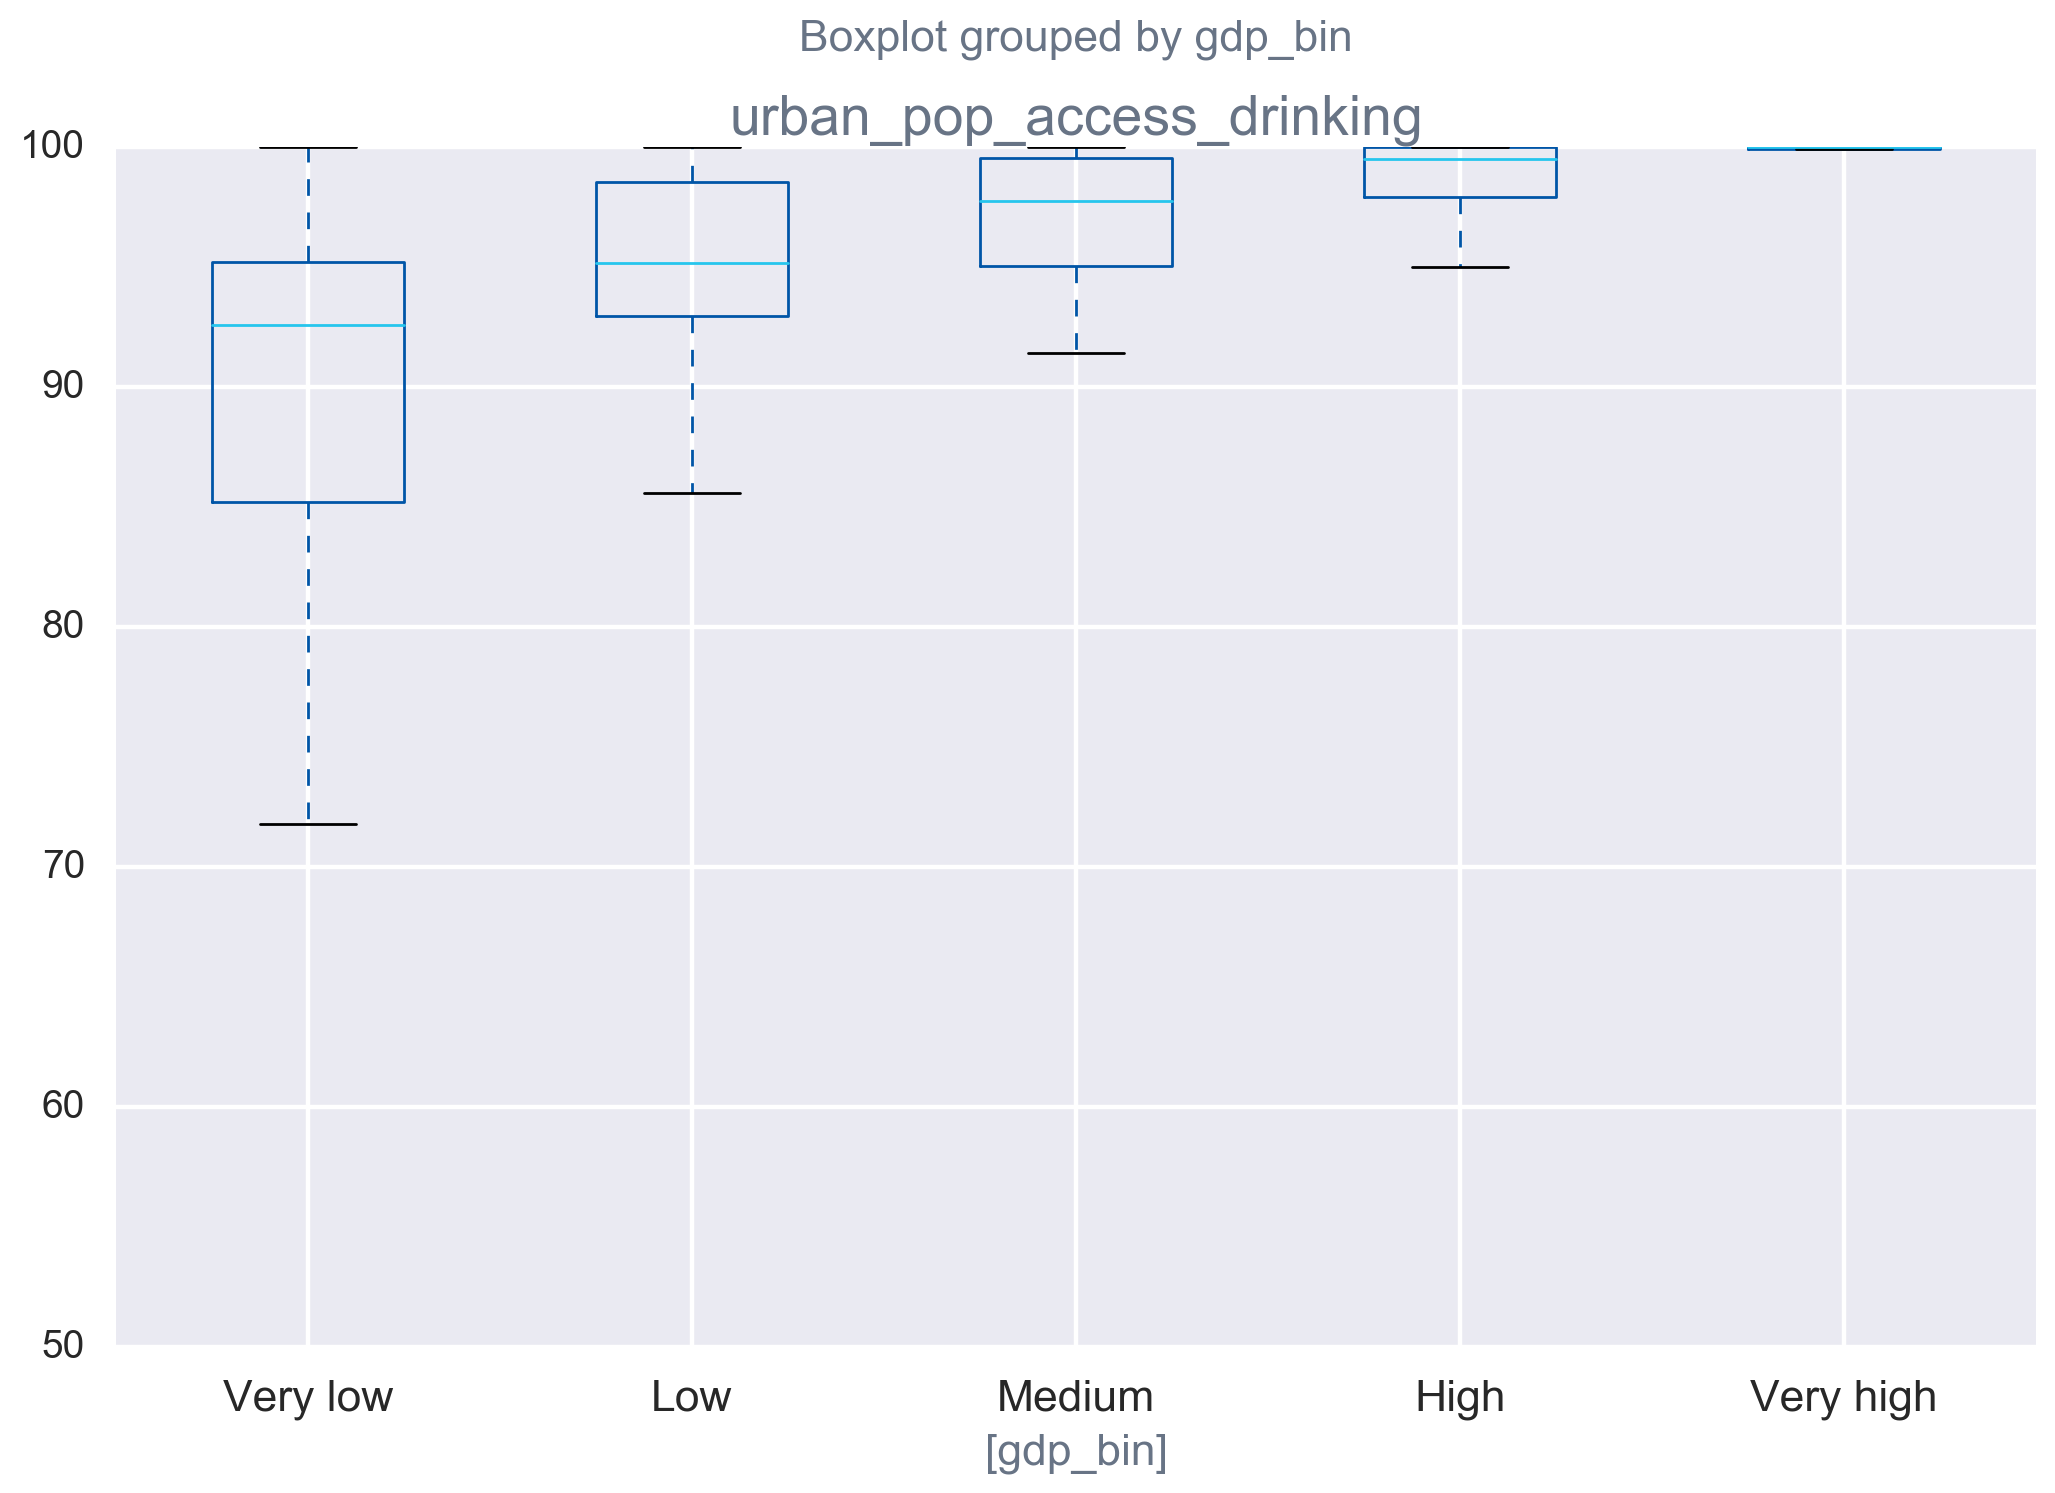

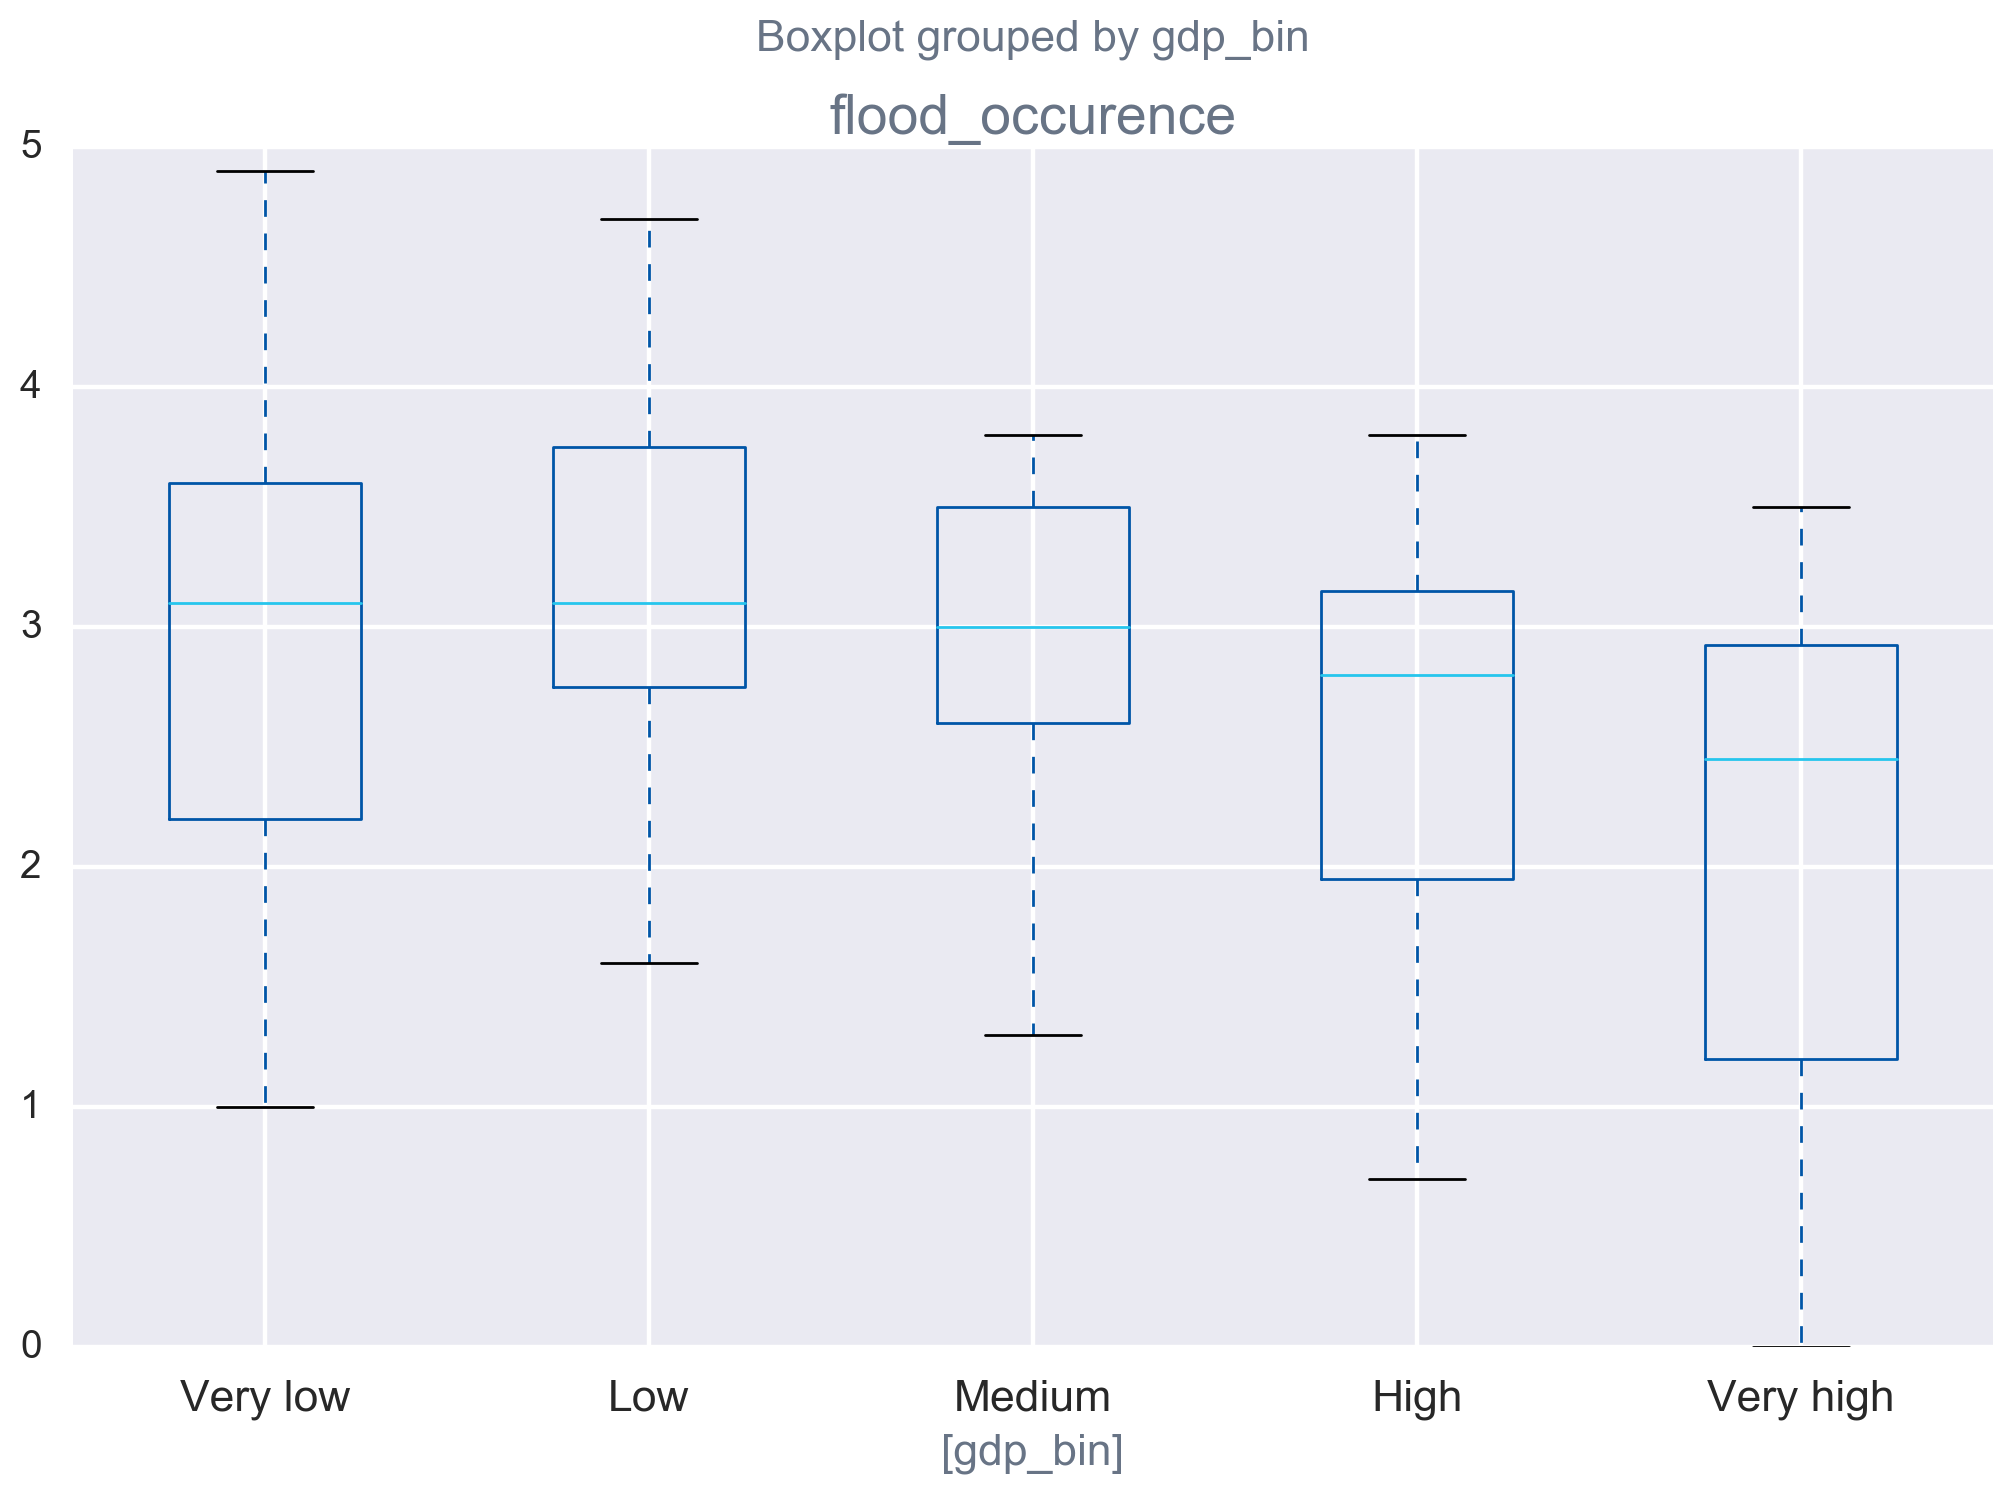

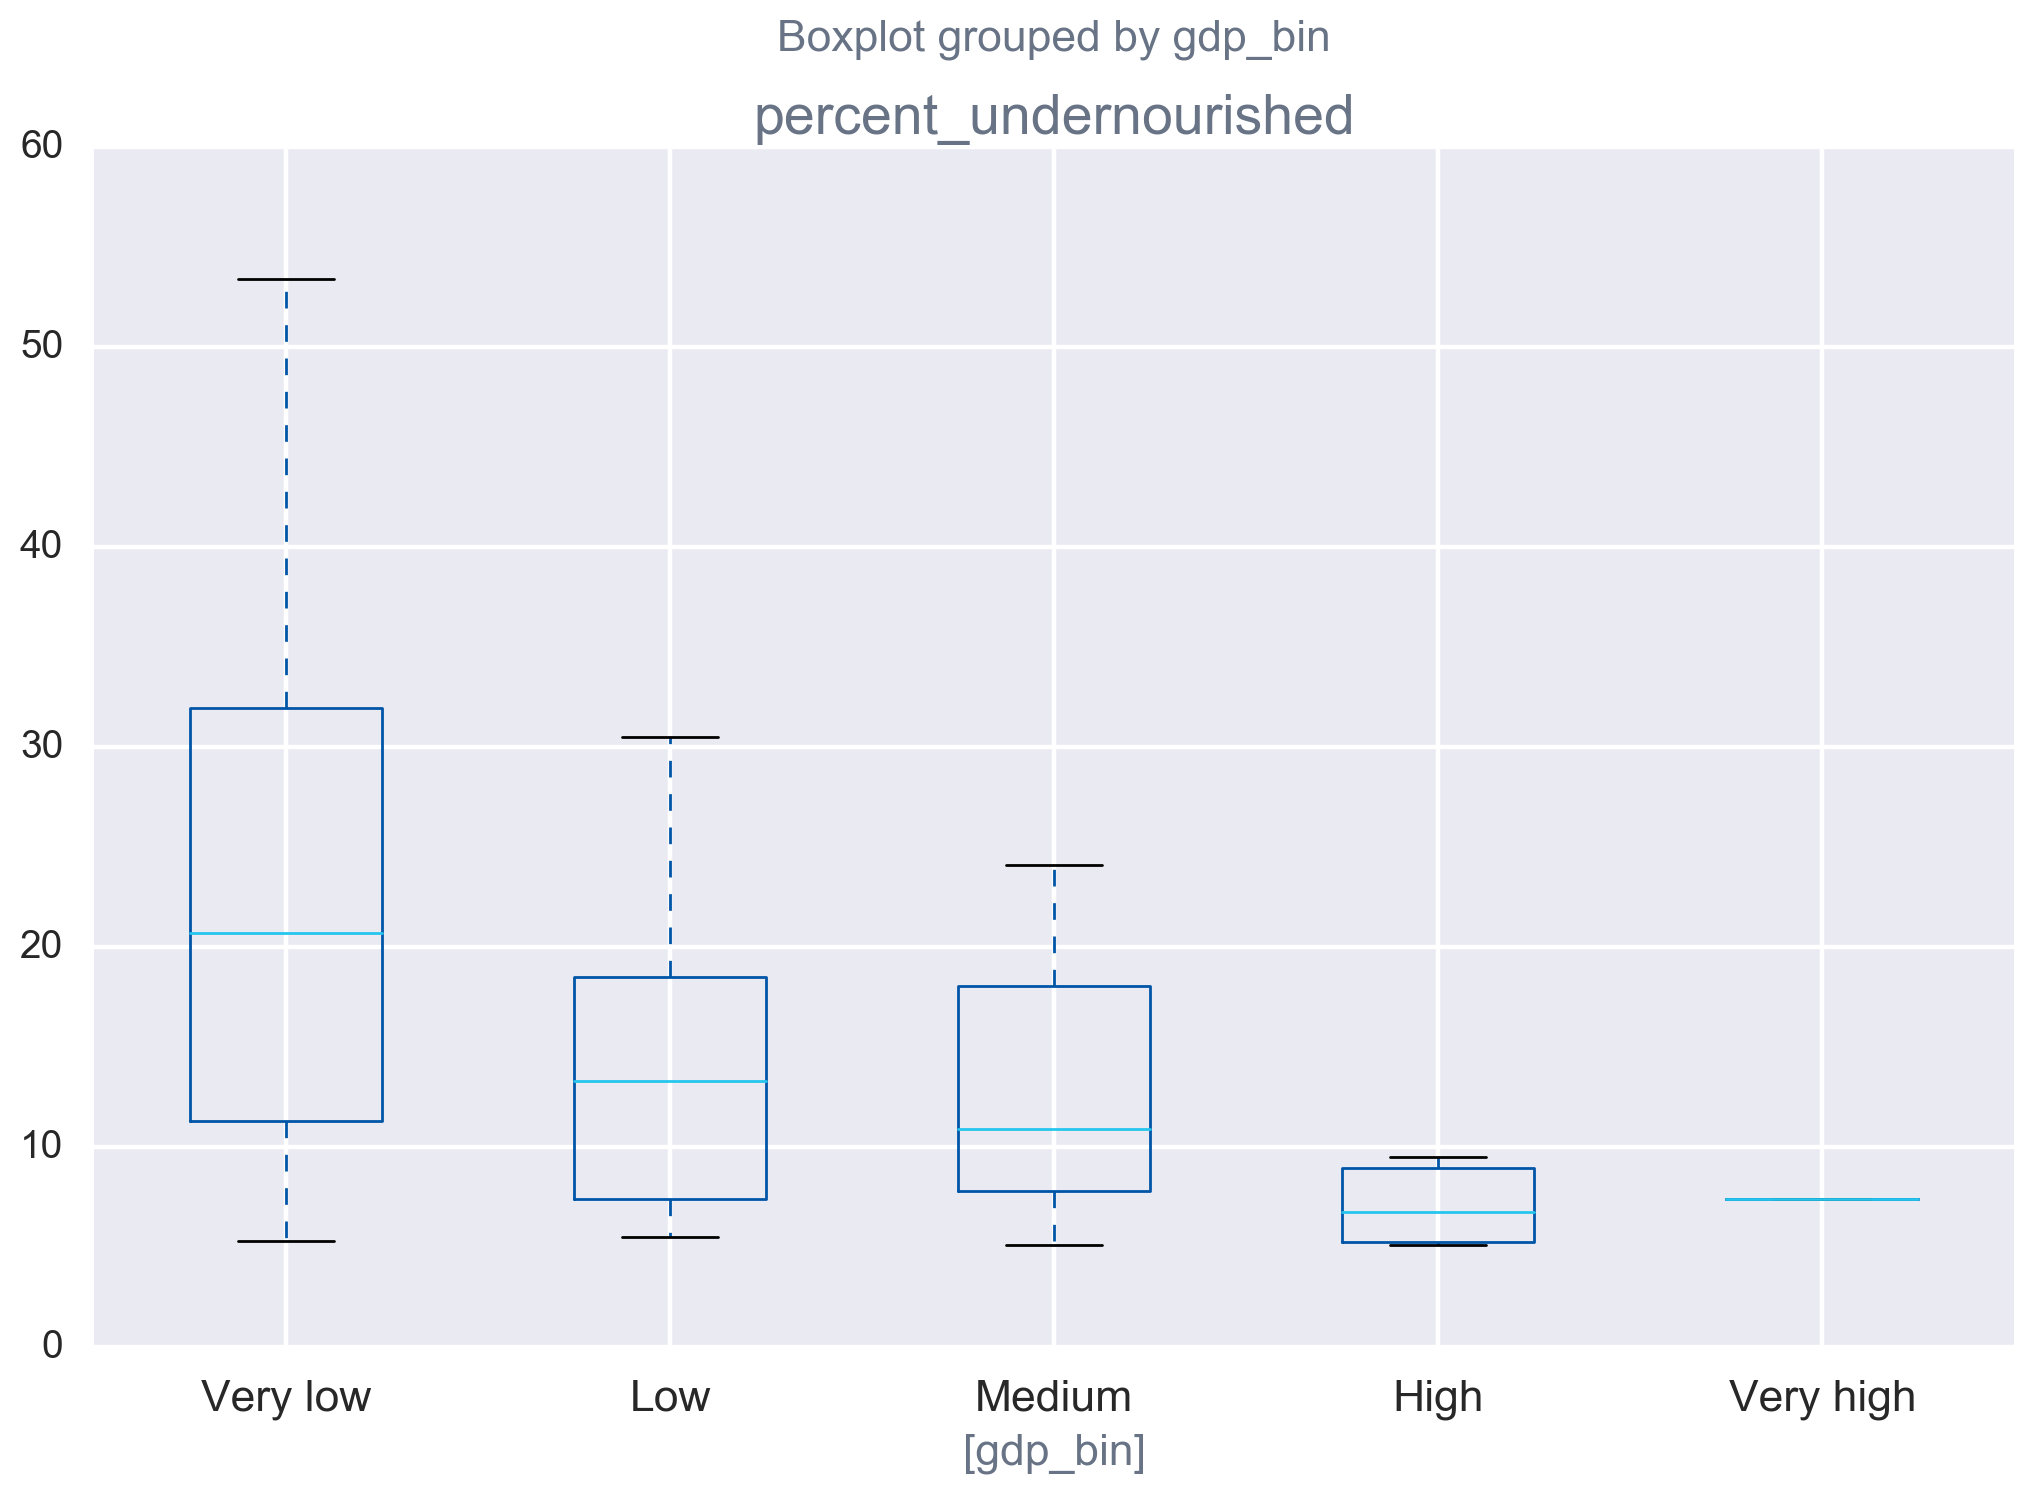

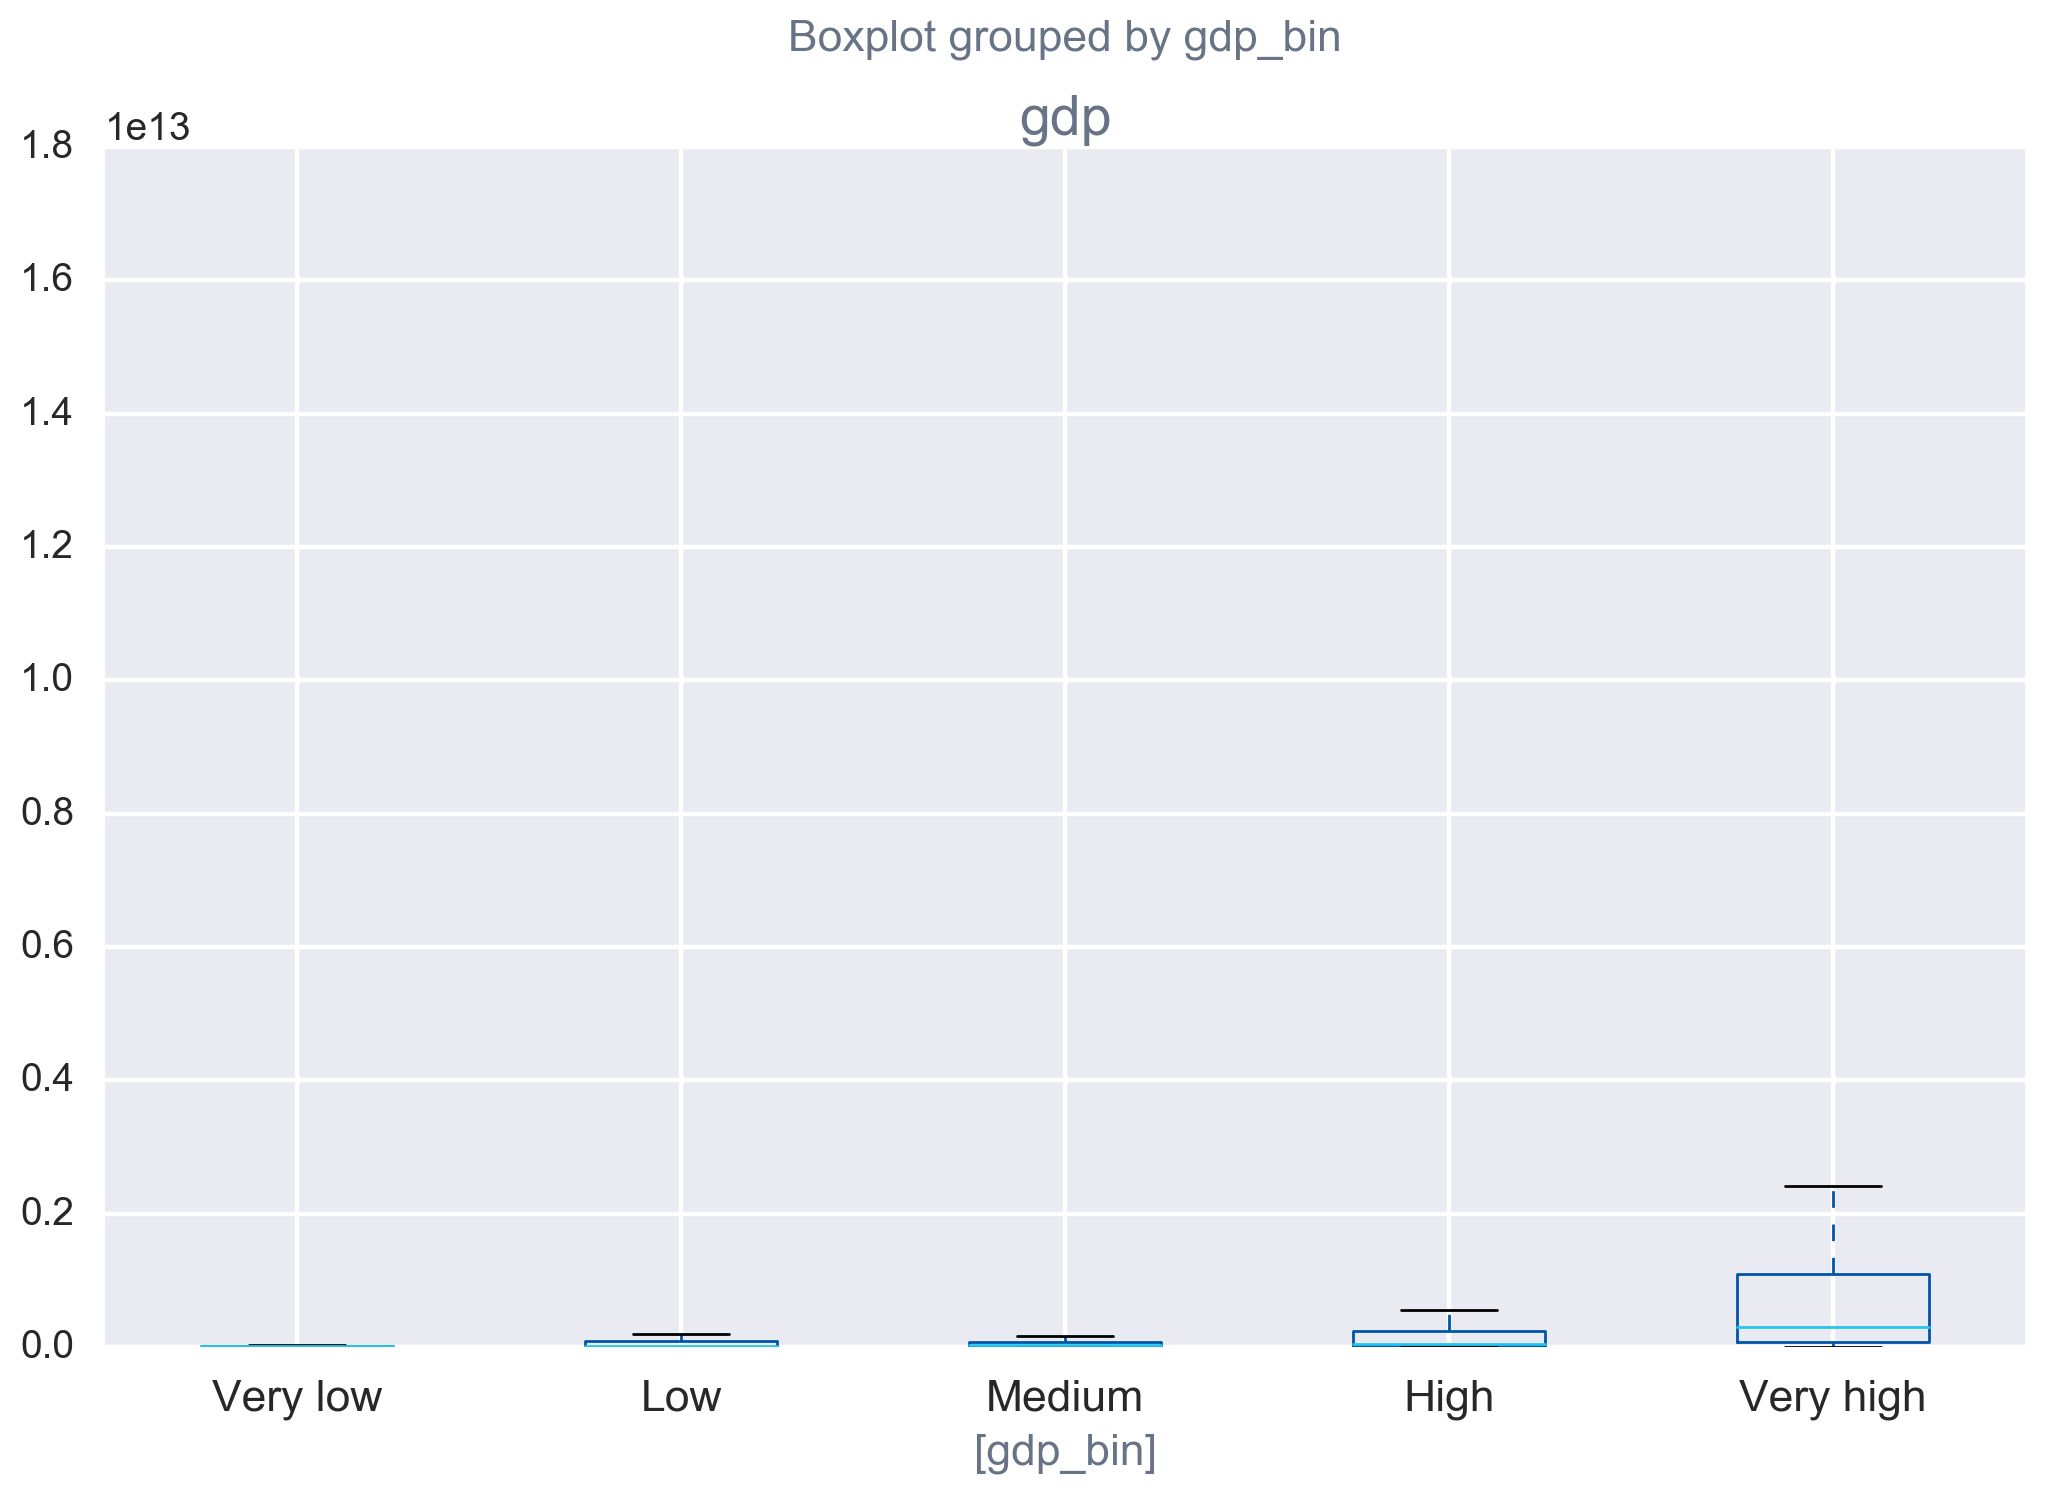

In [24]:
n = 10
for var in fps.variable.tolist()[:n]:
    mult_boxplots(recent, var, cat)

## Exercises:

- Gather observations, new hypotheses and questions
- Choose another "target variable" for analyzing